In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict
from thesis_v2.plots.main_results_tables import preprocess

In [2]:
from scipy.stats import sem
import numpy as np

In [3]:
import pandas as pd

In [4]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'source_analysis.pkl')
df_main_result = pd.read_pickle(f_main_result)

f_main_result_2 = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201001+20201012', 'source_analysis.pkl')
df_main_result_2 = pd.read_pickle(f_main_result_2)
df_main_result = pd.concat([df_main_result, df_main_result_2], axis=0).sort_index()
assert df_main_result.index.unique
del df_main_result_2

In [5]:
f_main_result_perf = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_perf = pd.read_pickle(f_main_result_perf)
f_main_result_2 = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201001', 'main_result.pkl')
f_main_result_3 = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201012', 'main_result.pkl')
df_main_result_perf = pd.concat([
    df_main_result_perf,
    pd.read_pickle(f_main_result_2),
    pd.read_pickle(f_main_result_3),
], axis=0).sort_index()
assert df_main_result_perf.index.unique

In [6]:
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           1           cm-avg       1280            17461   
                                                                                                  2560            17461   
                                                                                                  5120            17461   
                                                                                     cm-last      1280            17461   
                                                                                                  2560            17461   
...                                                                                                                 ...   
softplus True                 poisson   1          6         48          1           legacy       2560           127501   
                                                                                                  5120           127501   
                                                             64          1           legacy       1280           210893   
                                                                                                  2560           210893   
                                                                                                  5120           210893   

                                                                                                                                                source_analysis  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu     False                mse       0          2         8           1           cm-avg       1280                        {('I', 'B1'): 0.7241598808209915}  
                                                                                                  2560                         {('I', 'B1'): 2.134264596867908}  
                                                                                                  5120                         {('I', 'B1'): 2.870888935845869}  
                                                                                     cm-last      1280                        {('I', 'B1'): 0.7241598808209915}  
                                                                                                  2560                         {('I', 'B1'): 2.134264596867908}  
...                                                                                                                                                         ...  
softplus True                 poisson   1          6         48          1           legacy       2560        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.254067...  
                                                                                                  5120        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.987691...  
                                                             64          1           legacy       1280        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.126919...  
                                                                                                  2560        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.473848...  
                                                                                                  5120        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 2.301965...  

[15312 rows x 2 columns]

In [7]:
df_main_result_perf

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           1           cm-avg       1280              0.357125   
                                                                                                  2560              0.524376   
                                                                                                  5120              0.568387   
                                                                                     cm-last      1280              0.357125   
                                                                                                  2560              0.524376   
...                                                                                                                      ...   
softplus True                 poisson   1          6         48          1           legacy       2560              0.629205   
                                                                                                  5120              0.681167   
                                                             64          1           legacy       1280              0.561157   
                                                                                                  2560              0.632569   
                                                                                                  5120              0.682993   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           1           cm-avg       1280           0.170239   
                                                                                                  2560           0.245452   
                                                                                                  5120           0.263209   
                                                                                     cm-last      1280           0.170239   
                                                                                                  2560           0.245452   
...                                                                                                                   ...   
softplus True                 poisson   1          6         48          1           legacy       2560           0.289585   
                                                                                                  5120           0.313140   
                                                             64          1           legacy       1280           0.259474   
                                                                                                  2560           0.291328   
                                                                                                  5120           0.313777   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           1           cm-avg       1280          0.379368   
                                                                                                  2560          0.471792   
                                                                                                  5120          0.493379   
                                                                                     cm-last      1280          0.379368   
                                                                           

In [8]:
assert df_main_result.index.equals(df_main_result_perf.index)

In [9]:
def remove_high_cls(df_this):
    df_this = df_this[df_this.index.get_level_values('rcnn_bl_cls') <= 7]
    return df_this.sort_index()

df_main_result = remove_high_cls(df_main_result)
df_main_result_perf = remove_high_cls(df_main_result_perf)

assert df_main_result.index.equals(df_main_result_perf.index)

In [10]:
def get_normalized_vec(x):
#     keys = [('I',) + ('B1',) + ('R1',)*i for i in range(7)]
#     assert x.keys() <= set(keys)
    ret = np.zeros((8,))
    for key, v in x.items():
        assert len(key) >= 2 and len(key) <= 9
        ret[len(key)-2] += v  # -2 because minimal length of key is 2 (I + one Conv)
    ret = ret/ret.sum()
    return ret

# source_analysis_vec_scalar is sum(i*w for i, w in enumerage(vec))
# average depth.

def get_weighted_avg(x):
    assert x.ndim == 1 and x.shape == (8,) and np.all(x >= 0)
    return np.average(np.arange(8), weights=x)

df_main_result['source_analysis_vec'] = df_main_result['source_analysis'].map(lambda x: get_normalized_vec(x))
df_main_result['source_analysis_vec_scalar'] = df_main_result['source_analysis_vec'].map(lambda x: get_weighted_avg(x))
del df_main_result['source_analysis']

In [11]:
# show mean vs sem, for different cls

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
from scipy.spatial import distance

In [14]:
# check difference of source analysis vec among different nuisance parameters.
# Ideally I'd like to remove ALL nuisance parameters by averaging them out.

def check_nuisance_parameters(df_this):
    for param_name in ['act_fn', 'loss_type', 'ff_1st_bn_before_act', 'model_seed']:
        unique_vals = df_this.index.get_level_values(param_name).unique().tolist()
        assert len(unique_vals) == 2
        dd1 = df_this.xs(unique_vals[0], level=param_name)
        dd2 = df_this.xs(unique_vals[1], level=param_name)
        plt.close('all')
        fig, ax = plt.subplots(squeeze=True)
        print(param_name)
        assert dd1.index.equals(dd2.index)
        cosine_sim = [distance.cosine(x, y) for x, y in zip(
            dd1['source_analysis_vec'].values,
            dd2['source_analysis_vec'].values
        )]
        ax.hist(cosine_sim, bins=20)
        plt.show()
        
        plt.close('all')
        fig, ax = plt.subplots(squeeze=True)
        ax.scatter(dd1['source_analysis_vec_scalar'].values,
                   dd2['source_analysis_vec_scalar'].values)
        ax.plot([0, 8], [0, 8], linestyle='--')
        plt.show()

act_fn


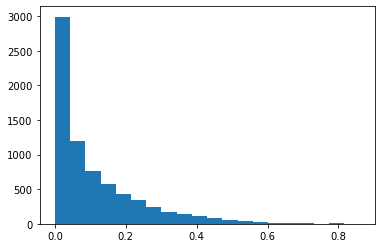

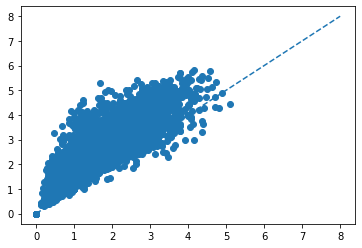

loss_type


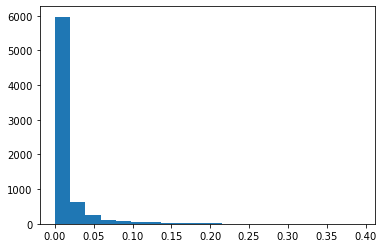

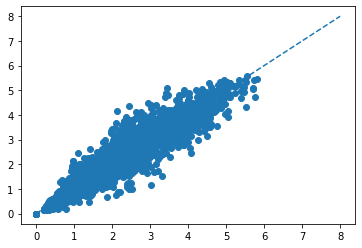

ff_1st_bn_before_act


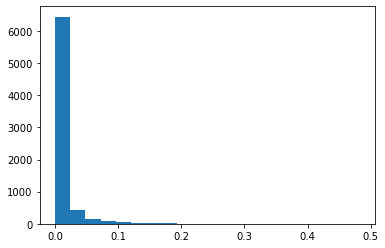

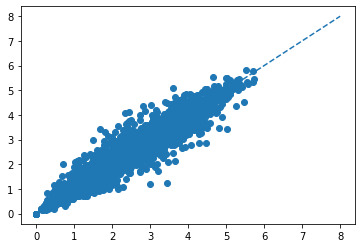

model_seed


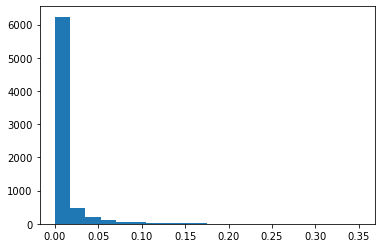

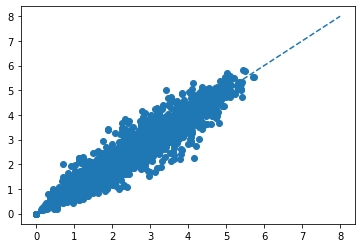

In [15]:
check_nuisance_parameters(df_main_result)
# act fn matters. other ones almost do not matter.
# let's reduce them out!!!

In [16]:
def get_reduced_data(df_this):
    # do not reduce on anything.
#     axes_to_reduce = ['loss_type', 'ff_1st_bn_before_act', 'model_seed']
    # reduce over model seed, which is purely random.
    axes_to_reduce = ['model_seed']
    columns, df_ff, df_r = preprocess(df_this, axes_to_reduce=axes_to_reduce, max_cls=None)
    return {
        'df_ff': df_ff,
        'df_r': df_r,
        'columns': columns,
    }

In [17]:
df_main_result_reduced_dict = get_reduced_data(df_main_result)
df_main_result_perf_reduced_dict = get_reduced_data(df_main_result_perf)

In [18]:
df_main_result_reduced_dict['df_ff']

num_param_mean  \
act_fn   ff_1st_bn_before_act loss_type num_layer out_channel train_keep                   
relu     False                mse       2         8           1280               17461.0   
                                                              2560               17461.0   
                                                              5120               17461.0   
                                                  16          1280               20509.0   
                                                              2560               20509.0   
...                                                                                  ...   
softplus True                 poisson   6         48          2560              127501.0   
                                                              5120              127501.0   
                                                  64          1280              210893.0   
                                                              2560              210893.0   
                                                              5120              210893.0   

                                                                                          source_analysis_vec_mean  \
act_fn   ff_1st_bn_before_act loss_type num_layer out_channel train_keep                                             
relu     False                mse       2         8           1280        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                              2560        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                              5120        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                  16          1280        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                              2560        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
...                                                                                                            ...   
softplus True                 poisson   6         48          2560        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                              5120        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                  64          1280        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                              2560        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                                                              5120        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   

                                                                          source_analysis_vec_scalar_mean  \
act_fn   ff_1st_bn_before_act loss_type num_layer out_channel train_keep                                    
relu     False                mse       2         8           1280                                    0.0   
                                                              2560                                    0.0   
                                                              5120                                    0.0   
                                                  16          1280                                    0.0   
                                                              2560                                    0.0   
...                                                                                                   ...   
softplus True                 poisson   6         48          2560                                    4.0   
                                                              5120                                    4.0   
                                                  64          1280                                    4.0   
                                                              2560                                    4.0   
                                  

In [19]:
df_main_result_reduced_dict['df_r']

num_param_mean  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                   
relu     False                mse       8           2           cm-avg       1280       3                 18053.0   
                                                                                        5                 19237.0   
                                                                             2560       3                 18053.0   
                                                                                        5                 19237.0   
                                                                             5120       3                 18053.0   
...                                                                                                           ...   
softplus True                 poisson   64          7           inst-last    1280       5                175181.0   
                                                                             2560       3                100557.0   
                                                                                        5                175181.0   
                                                                             5120       3                100557.0   
                                                                                        5                175181.0   

                                                                                                                            source_analysis_vec_mean  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                                                      
relu     False                mse       8           2           cm-avg       1280       3          [0.7768625143847689, 0.22313748561523106, 0.0,...   
                                                                                        5          [0.0, 0.8354310164776343, 0.16456898352236576,...   
                                                                             2560       3          [0.6823590815103937, 0.31764091848960635, 0.0,...   
                                                                                        5          [0.0, 0.7848868764312595, 0.21511312356874046,...   
                                                                             5120       3          [0.6056706055066041, 0.3943293944933959, 0.0, ...   
...                                                                                                                                              ...   
softplus True                 poisson   64          7           inst-last    1280       5          [0.0, 0.23630998354076993, 0.2501115149390006,...   
                                                                             2560       3          [0.16412503472222328, 0.16153037841295764, 0.1...   
                                                                                        5          [0.0, 0.140385737416289, 0.1892621954997613, 0...   
                                                                             5120       3          [0.09463418883688596, 0.11265638854708535, 0.1...   
                                                                                        5          [0.0, 0.06966245178979988, 0.12004086667971517...   

                                                                                                   source_analysis_vec_scalar_mean  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                                    
relu     False                mse       8           2           cm-avg       1280       3                                 0.223137   
                                                                                        5                                 1.164569   
                                                                

In [20]:
# from sklearn.decomposition import PCA

In [21]:
# # let's try some PCA on the vectors.
# def try_pca(df_this):
#     for train_keep in df_this.index.get_level_values('train_keep').unique():
#         for num_layer in df_this.index.get_level_values('num_layer').unique():
#             key = (train_keep, num_layer)
#             print(key)
#             df_this_slice = df_this.xs(key=key, level=('train_keep', 'num_layer'))
#             data_this = np.array([x for x in df_this_slice['source_analysis_vec_mean'].values])
#             assert data_this.ndim == 2
#             assert data_this.shape[1] == 8
#             pca = PCA(random_state=0)
#             pca.fit(data_this)
#             print(np.cumsum(pca.explained_variance_ratio_))

In [22]:
# try_pca(df_main_result_reduced_dict['df_r'])
# # 4 dim is enough. ideally I want 1.

In [23]:
def merge_reduced_dict(dict_vec, dict_perf):
    # merge df_r
    assert dict_vec['df_r'].index.equals(dict_perf['df_r'].index)
    df_r = pd.concat([
        dict_vec['df_r'][['source_analysis_vec_mean', 'source_analysis_vec_scalar_mean']],
        dict_perf['df_r'][['cc2_normed_avg_mean']]
    ], axis=1)
    
    # merge df_ff
    
    assert dict_vec['df_ff'].index.equals(dict_perf['df_ff'].index)
    df_ff = pd.concat([
        dict_vec['df_ff'][['source_analysis_vec_mean', 'source_analysis_vec_scalar_mean']],
        dict_perf['df_ff'][['cc2_normed_avg_mean']]
    ], axis=1)
    
    # return 
    return {
        'df_r': df_r,
        'df_ff': df_ff,
    }

In [24]:
merged_reduced_dict = merge_reduced_dict(
    df_main_result_reduced_dict,
    df_main_result_perf_reduced_dict
)



In [25]:
def merge_ff_and_r(*, df_r, df_ff):
    df_ff = df_ff.copy()
    df_r_index_values = [
        df_r.index.get_level_values(x) for x in df_ff.index.names
    ]
    df_r_index_values = set(zip(*df_r_index_values))
    
    df_ff = df_ff[df_ff.index.isin(df_r_index_values)]
    
    df_ff['rcnn_bl_cls'] = 1
    df_ff['readout_type'] = 'feedforward'
    df_ff = df_ff.set_index(['rcnn_bl_cls', 'readout_type'], append=True)
    
    assert set(df_r.index.names) == set(df_ff.index.names)
    
    df_ff = df_ff.reorder_levels(
        order=df_r.index.names,
        axis=0
    ).sort_index()
    
    df_merged = pd.concat([df_r, df_ff], axis=0).sort_index()
    assert df_merged.index.is_unique
    return {
        'df_merged': df_merged,
    }
    

In [26]:
df_merged_dict = merge_ff_and_r(**merged_reduced_dict)

In [27]:
df_merged_dict['df_merged']

source_analysis_vec_mean  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                                                      
relu     False                mse       8           1           feedforward  1280       3                   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                                                        5                   [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]   
                                                                             2560       3                   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                                                                                        5                   [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]   
                                                                             5120       3                   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
...                                                                                                                                              ...   
softplus True                 poisson   64          7           inst-last    1280       5          [0.0, 0.23630998354076993, 0.2501115149390006,...   
                                                                             2560       3          [0.16412503472222328, 0.16153037841295764, 0.1...   
                                                                                        5          [0.0, 0.140385737416289, 0.1892621954997613, 0...   
                                                                             5120       3          [0.09463418883688596, 0.11265638854708535, 0.1...   
                                                                                        5          [0.0, 0.06966245178979988, 0.12004086667971517...   

                                                                                                   source_analysis_vec_scalar_mean  \
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                                    
relu     False                mse       8           1           feedforward  1280       3                                 1.000000   
                                                                                        5                                 3.000000   
                                                                             2560       3                                 1.000000   
                                                                                        5                                 3.000000   
                                                                             5120       3                                 1.000000   
...                                                                                                                            ...   
softplus True                 poisson   64          7           inst-last    1280       5                                 2.903311   
                                                                             2560       3                                 2.770139   
                                                                                        5                                 3.600660   
                                                                             5120       3                                 3.443724   
                                                                                        5                                 4.379643   

                                                                                                   cc2_normed_avg_mean  
act_fn   ff_1st_bn_before_act loss_type out_channel rcnn_bl_cls readout_type train_keep num_layer                       
relu     False                mse       8           1           feedforward  1280       3                     0.412588  
                                         

In [28]:
from sklearn.cluster import KMeans

def get_clustering(perf_vec, num_cluster):
    assert perf_vec.ndim == 1
    y = KMeans(n_clusters=num_cluster, random_state=0).fit_predict(perf_vec[:,np.newaxis])
#     assert np.array_equal(np.unique(y), np.arange(num_cluster))
#     return y
    # simply assign them into buckets
    
    # visually not pleasing, though similar message to readers
#     assert perf_vec.size > num_cluster
#     size_per_g = (perf_vec.size -1) // num_cluster + 1  # same as ceil(size/num_cluster)
#     y = np.argsort(perf_vec)
#     y[y] = np.arange(perf_vec.size)
#     y = y//size_per_g
    
    # TODO get a more smooth version.
    
    
    
    assert np.array_equal(np.unique(y), np.arange(num_cluster))
    return y


In [61]:
def plot_stuff(df_list, label_list, title, *, subplots, plot_line):
    
    c_list = ['blue', 'orange', 'green', 'red', 'gold']
    assert len(df_list) == len(label_list) <= len(c_list)
    
    plt.close('all')
    
    if not subplots:
        fig, ax = plt.subplots(squeeze=True, figsize=(20, 6),)
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(df_list), figsize=(20, 6), squeeze=False, sharex=True, sharey=True)
        axes = axes.ravel()
    
    
    
    for idx, (df, label, color) in enumerate(zip(df_list, label_list, c_list)):
        if subplots:
            ax = axes[idx]
    
        ax.scatter(
            df['cc2_normed_avg_mean'].values,
            df['source_analysis_vec_scalar_mean'].values,
            label=str(label), alpha=0.75, s=2, c=color,
        )
        ax.legend(loc='best')
        ax.set_xlabel('perf')
        ax.set_ylabel('depth')
        
        
        if plot_line is not None:
            line_data = []
            assert isinstance(plot_line, int)
            # cluster data into plot_line clusters according to perf
            y_clustering = get_clustering(df['cc2_normed_avg_mean'].values, num_cluster=plot_line)
#             print(y_clustering)
            for cluster_idx in range(plot_line):
                idx_to_choose = (y_clustering == cluster_idx)
                assert np.any(idx_to_choose)
                line_data.append((
                    df['cc2_normed_avg_mean'].values[idx_to_choose].mean(),
                    df['source_analysis_vec_scalar_mean'].values[idx_to_choose].mean(),
                )
                )
#             print(line_data)
            line_data = sorted(line_data, key=lambda x: x[0])
            ax.plot([x[0] for x in line_data], [x[1] for x in line_data], linewidth=2, color=color)
                
        
        if subplots:
            ax.set_title(str(label))
    fig.suptitle(title)
    plt.show()

In [62]:
def plot_stuff_one_aspect(df_merged, aspect, suffix, subplots=False, plot_line=None):
    label_list_train_size = df_merged.index.get_level_values(aspect).unique()
    df_list_train_size = [df_merged.xs(tk, level=aspect) for tk in label_list_train_size]
    
    
    plot_stuff(df_list_train_size, label_list_train_size, aspect + suffix, subplots=subplots, plot_line=plot_line)

In [65]:
def show_scatter_plots(df_merged):
    num_cluster = 10  # bigger than this will give shaky curves. not good.
    
    plot_stuff_one_aspect(df_merged, 'train_keep', ' all')
    plot_stuff_one_aspect(df_merged, 'out_channel', ' all')
    plot_stuff_one_aspect(df_merged, 'readout_type', ' all', subplots=True, plot_line=num_cluster)
    plot_stuff_one_aspect(df_merged, 'num_layer', ' all')
    plot_stuff_one_aspect(df_merged, 'act_fn', ' all')
    # the trend for out_channel is only observable when train keep is big.
    for rcnn_bl_cls in df_merged.index.get_level_values('rcnn_bl_cls').unique():
        df_merged_this_rcnn_bl_cls = df_merged.xs(rcnn_bl_cls, level='rcnn_bl_cls')
        plot_stuff_one_aspect(df_merged_this_rcnn_bl_cls, 'train_keep', f' rcnn_bl_cls {rcnn_bl_cls}')
        plot_stuff_one_aspect(df_merged_this_rcnn_bl_cls, 'out_channel', f' rcnn_bl_cls {rcnn_bl_cls}', plot_line=num_cluster)
        plot_stuff_one_aspect(df_merged_this_rcnn_bl_cls, 'readout_type', f' rcnn_bl_cls {rcnn_bl_cls}', subplots=True, plot_line=num_cluster)
        plot_stuff_one_aspect(df_merged_this_rcnn_bl_cls, 'num_layer', f' rcnn_bl_cls {rcnn_bl_cls}')
        plot_stuff_one_aspect(df_merged_this_rcnn_bl_cls, 'act_fn', f' rcnn_bl_cls {rcnn_bl_cls}')
        for num_layer in df_merged_this_rcnn_bl_cls.index.get_level_values('num_layer').unique():
            df_merged_this_rcnn_bl_cls_this_layer = df_merged_this_rcnn_bl_cls.xs(num_layer, level='num_layer')
            plot_stuff_one_aspect(df_merged_this_rcnn_bl_cls_this_layer, 'readout_type', f' rcnn_bl_cls {rcnn_bl_cls} layer {num_layer}',
                                  subplots=True, plot_line=num_cluster)
    
    
    for train_keep in df_merged.index.get_level_values('train_keep').unique():
        df_merged_this_train_size = df_merged.xs(train_keep, level='train_keep')
        plot_stuff_one_aspect(df_merged_this_train_size, 'out_channel', f' train size {train_keep}', plot_line=num_cluster)
        plot_stuff_one_aspect(df_merged_this_train_size, 'readout_type', f' train size {train_keep}', subplots=True, plot_line=num_cluster)
        plot_stuff_one_aspect(df_merged_this_train_size, 'num_layer', f' train size {train_keep}')
        plot_stuff_one_aspect(df_merged_this_train_size, 'act_fn', f' train size {train_keep}')
        for num_layer in df_merged_this_train_size.index.get_level_values('num_layer').unique():
            df_merged_this_train_size_this_layer = df_merged_this_train_size.xs(num_layer, level='num_layer')
            plot_stuff_one_aspect(df_merged_this_train_size_this_layer, 'readout_type', f' train size {train_keep} layer {num_layer}',
                                  subplots=True, plot_line=num_cluster)
        
#         df_ff = df_merged_this_train_size.xs(key='feedforward', level='readout_type')
        
        
#         for readout_type in df_merged_this_train_size.index.get_level_values('readout_type').unique():
#             if readout_type == 'feedforward':
#                 continue
#             df_r = df_merged_this_train_size.xs(key=readout_type, level='readout_type')
            
            
#             # plot scatter plot for perf vs depth.
            
#             # plot the ff part.
#             plot_stuff([df_r, df_ff], [readout_type, 'ff'], f'training size {train_keep}, readout type {readout_type}', )
            
            
#             # further decompose
            

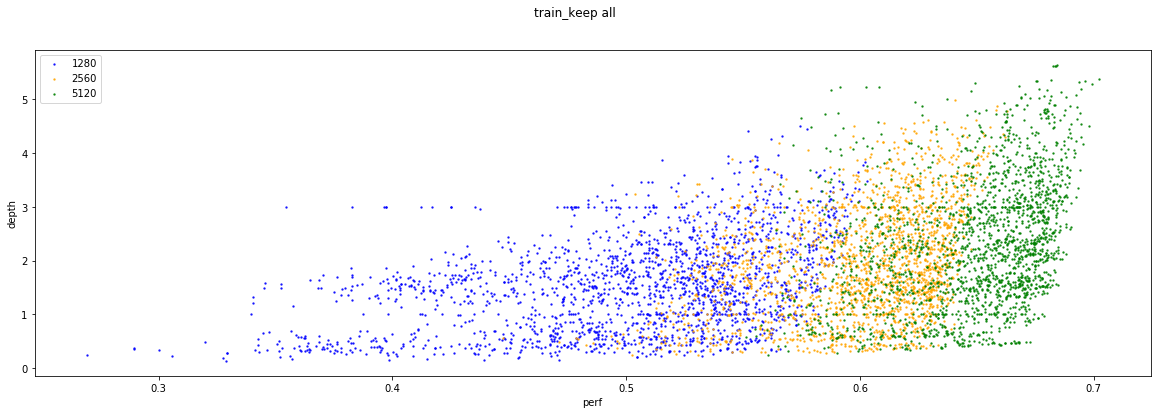

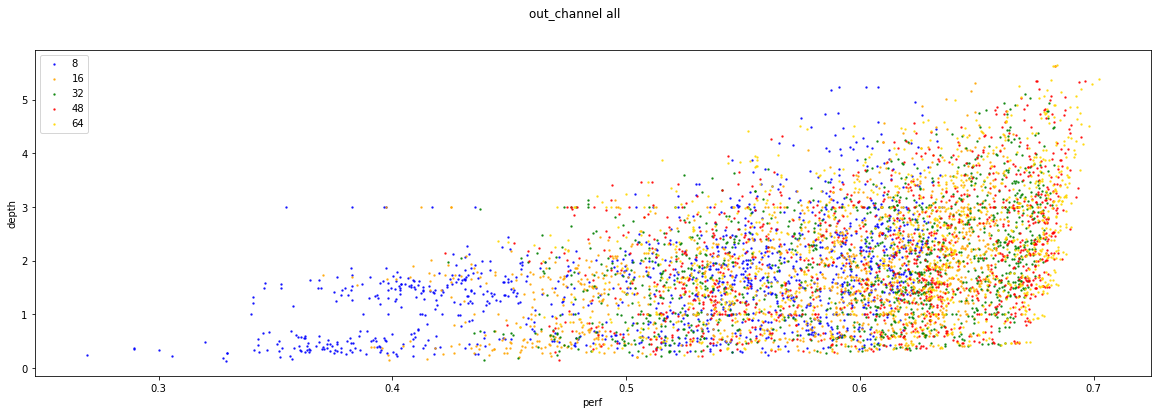

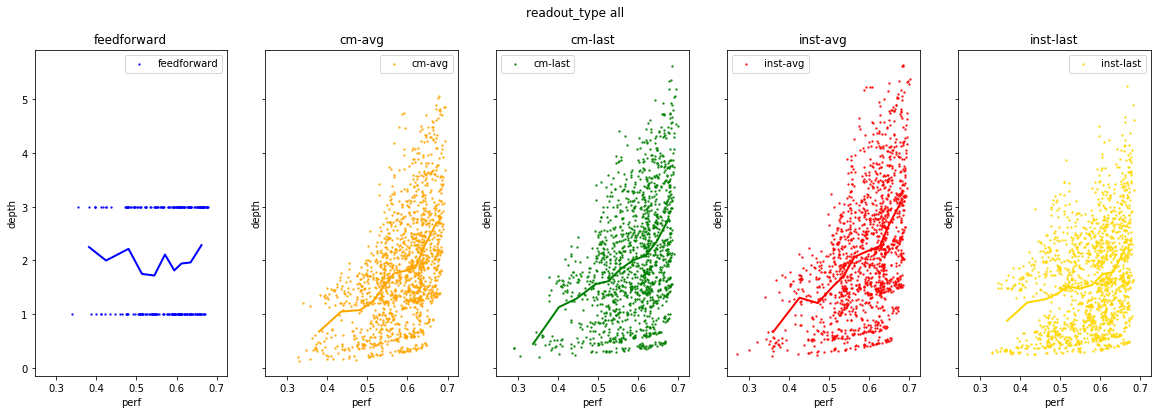

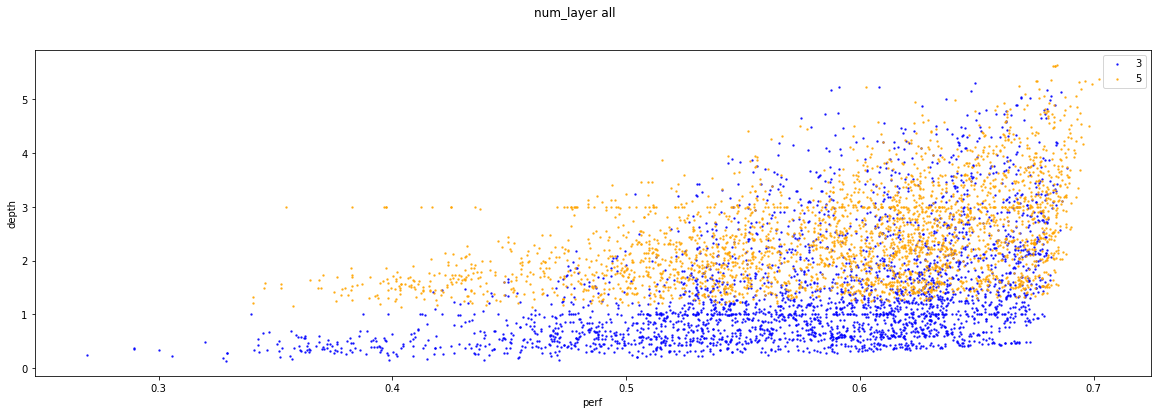

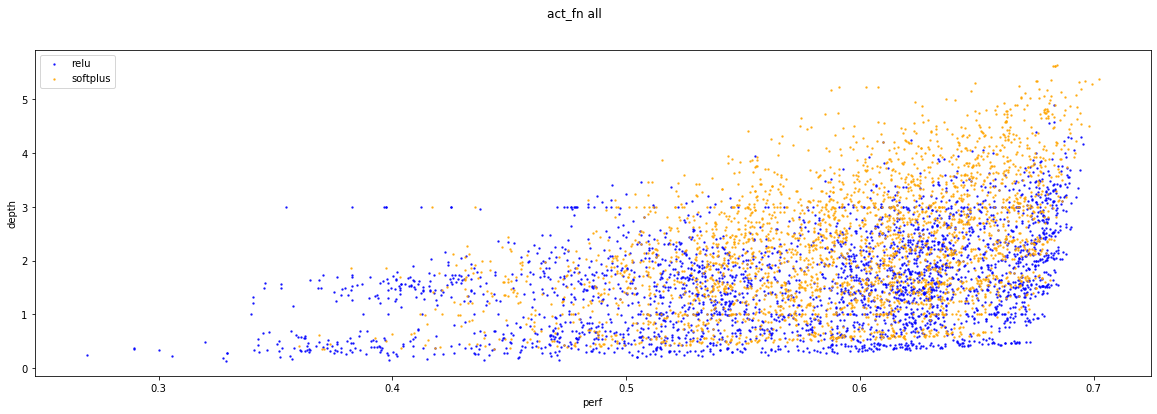

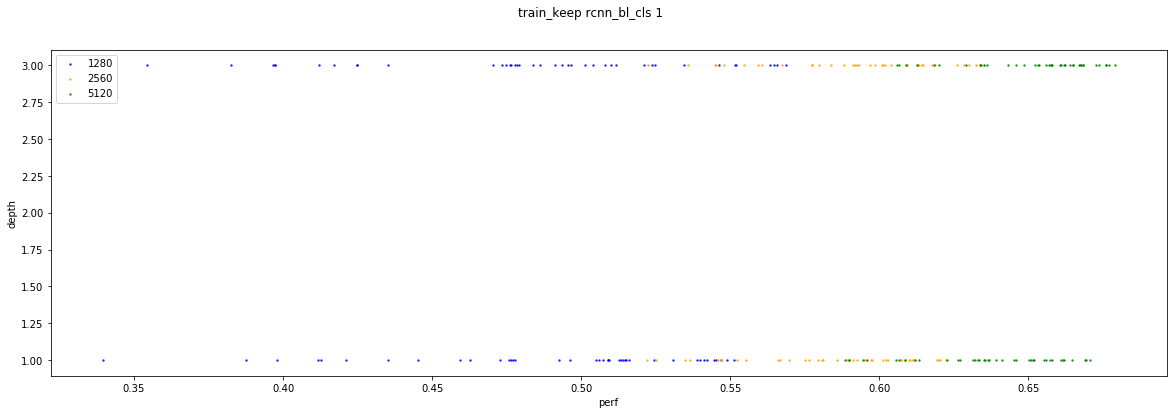

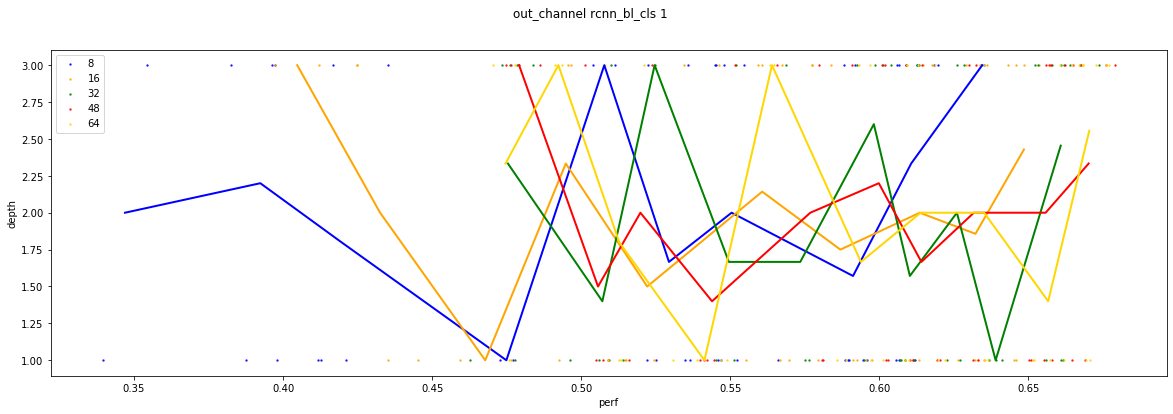

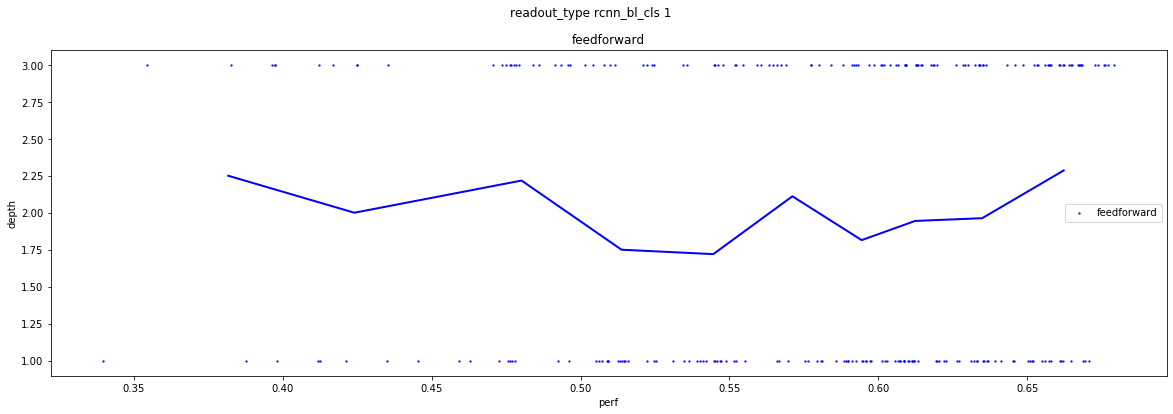

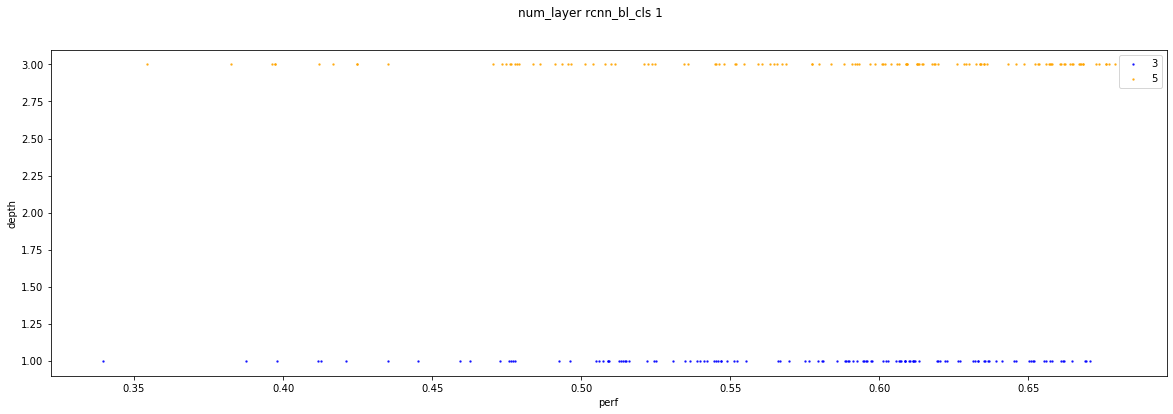

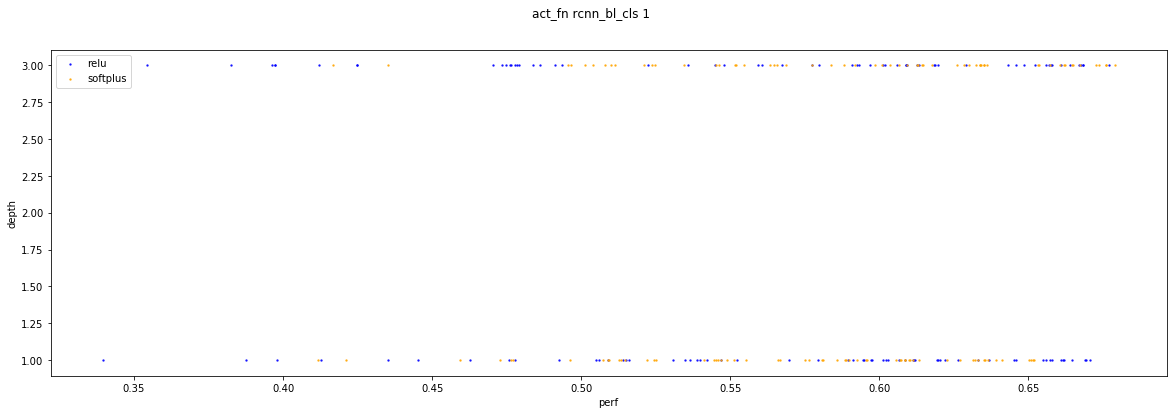

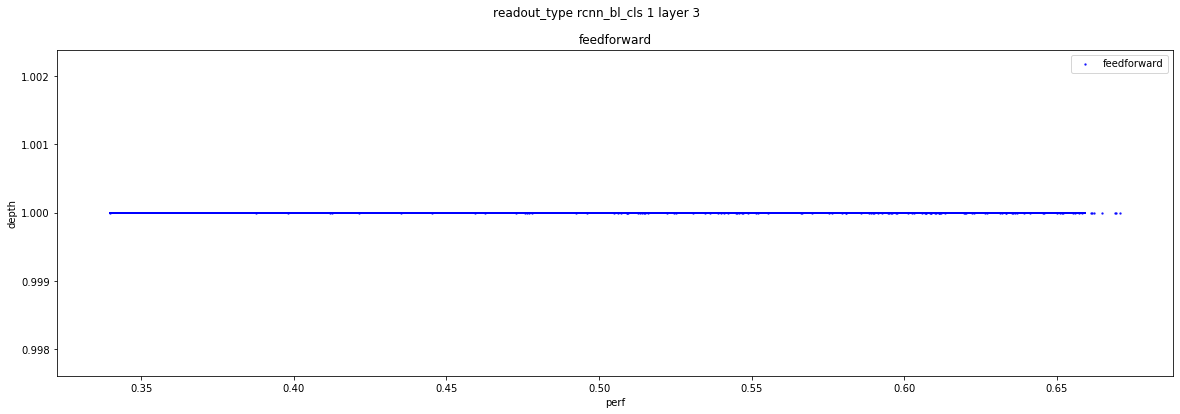

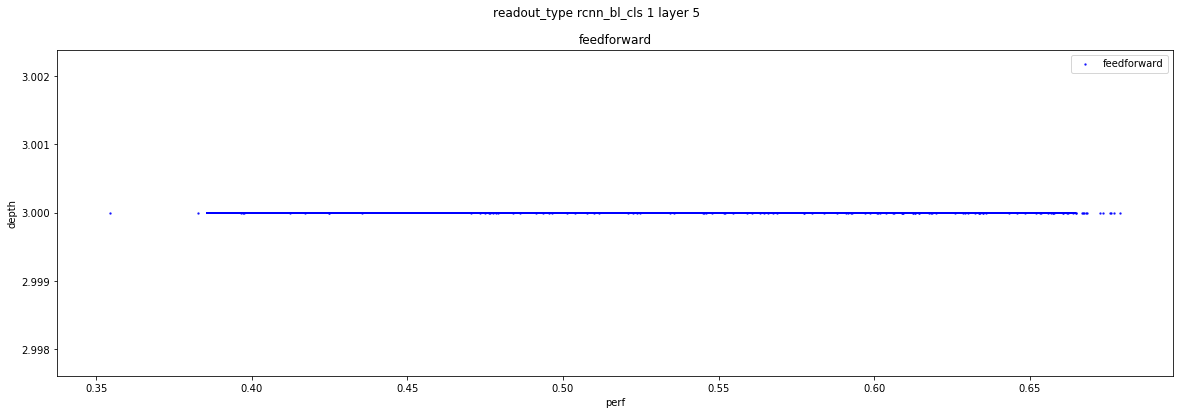

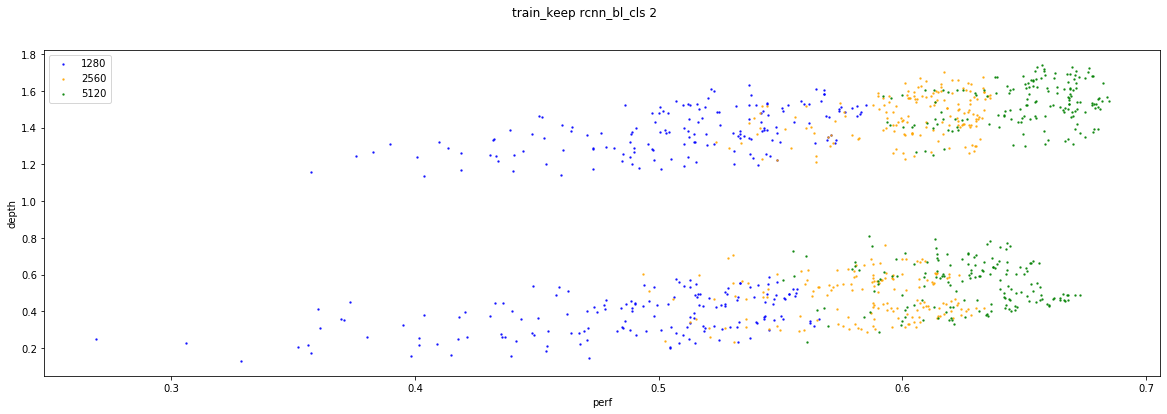

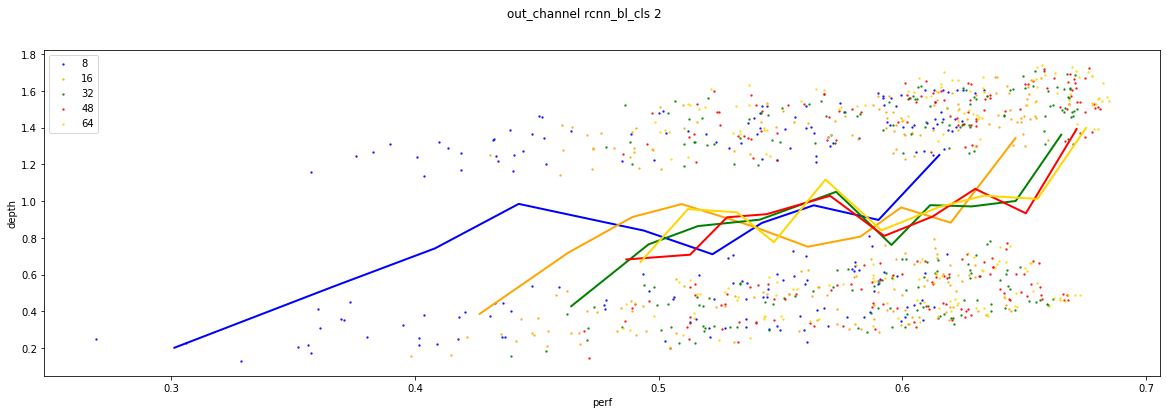

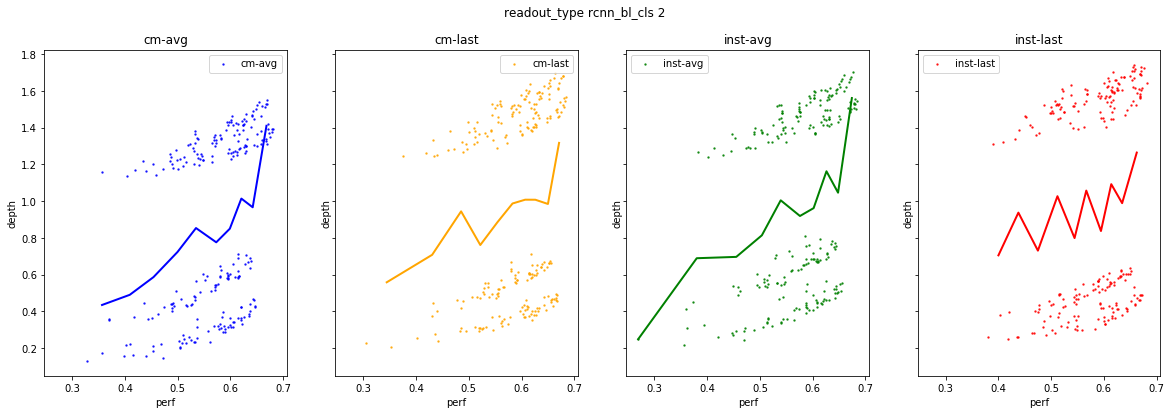

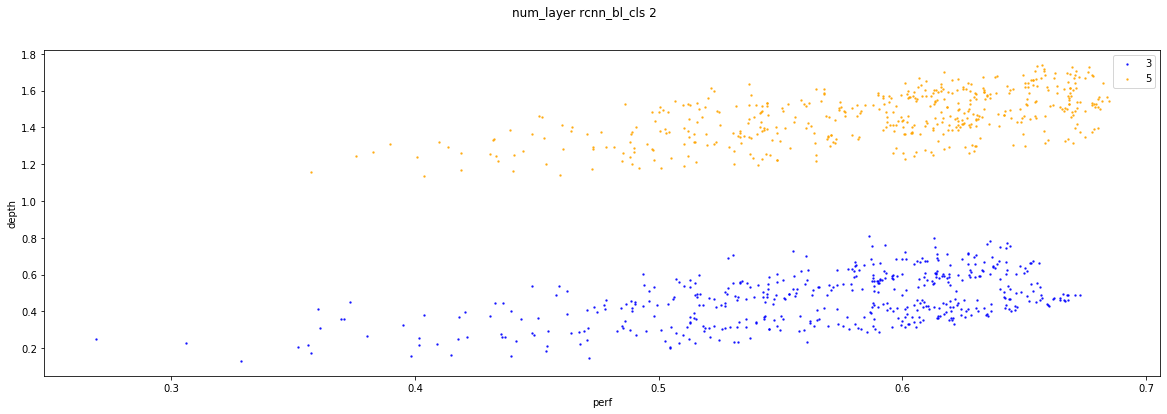

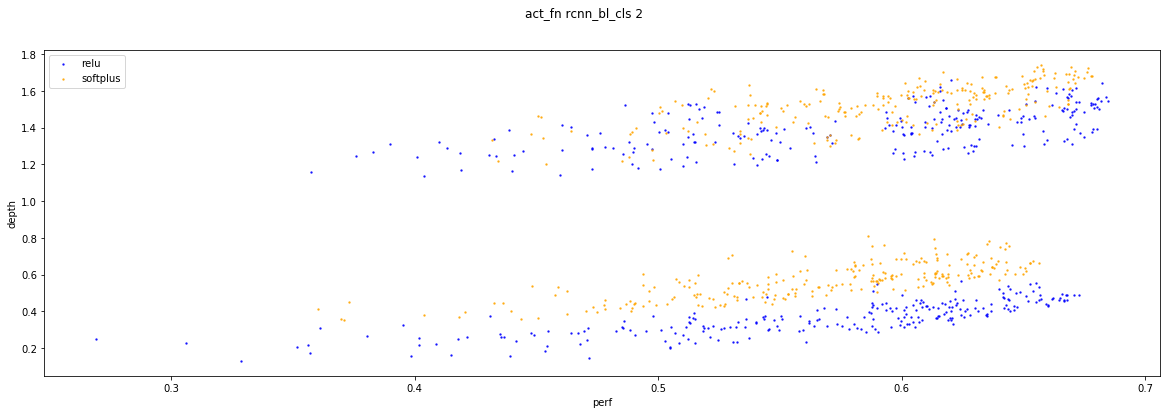

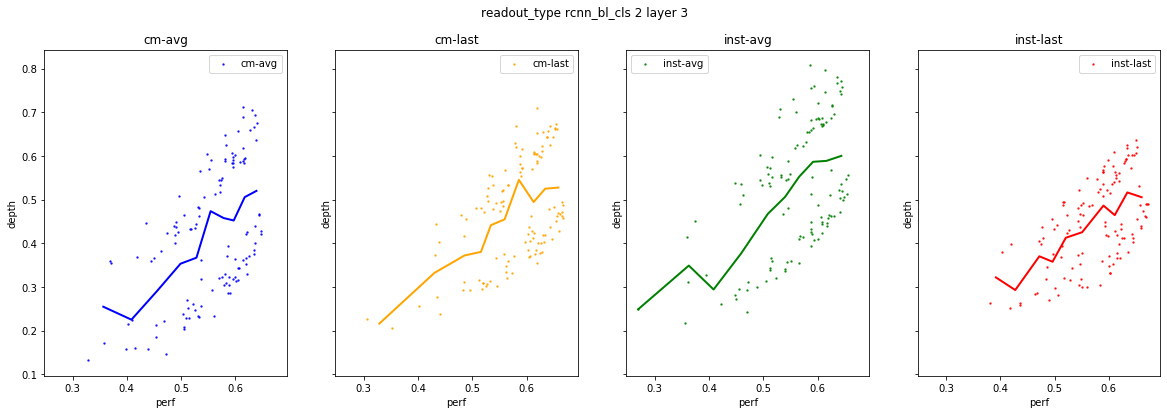

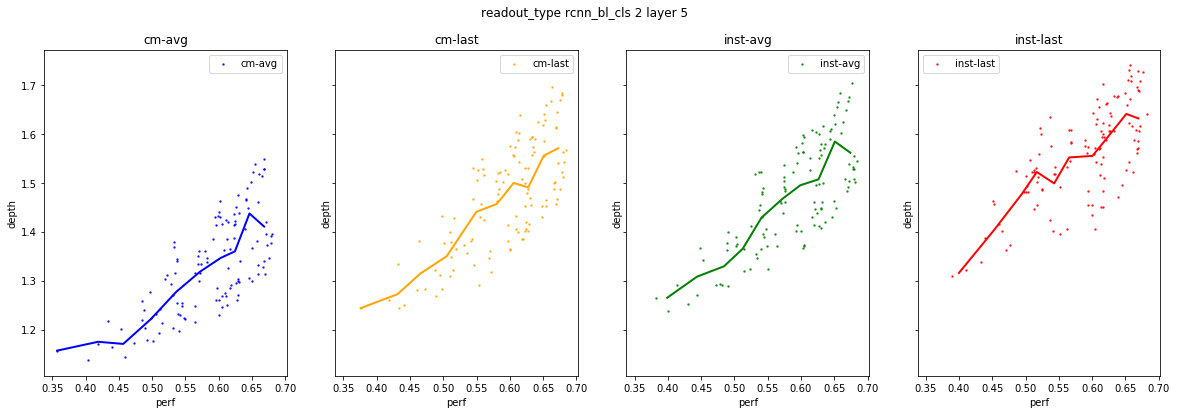

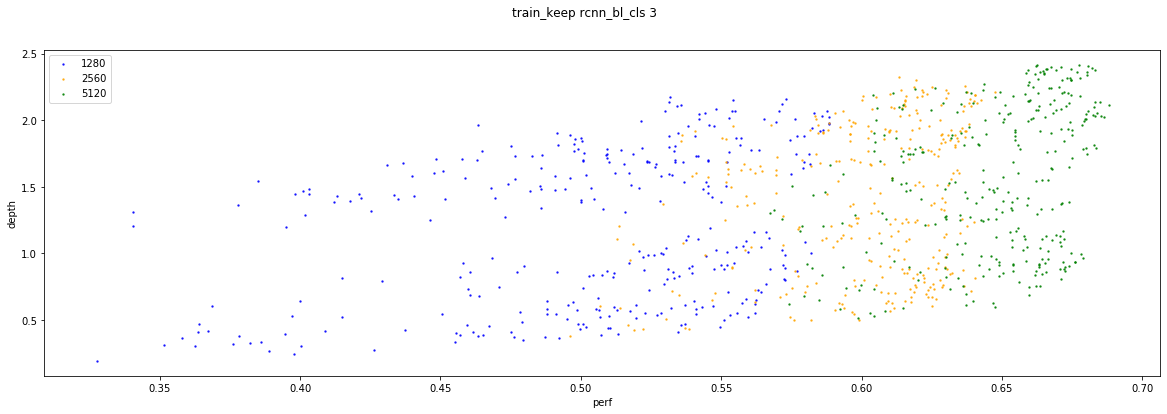

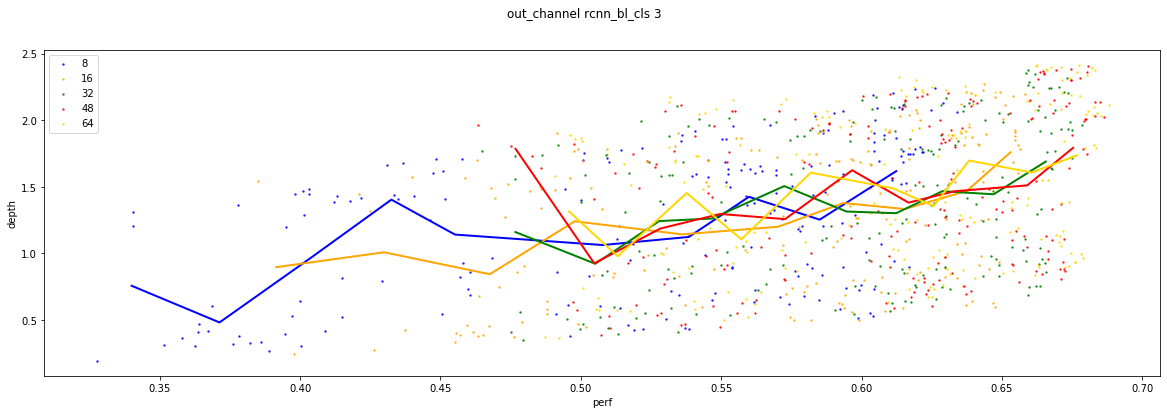

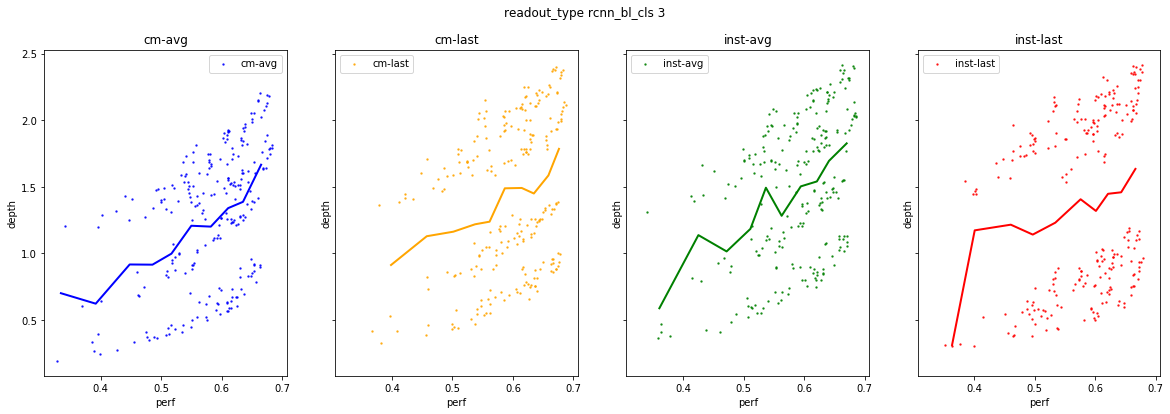

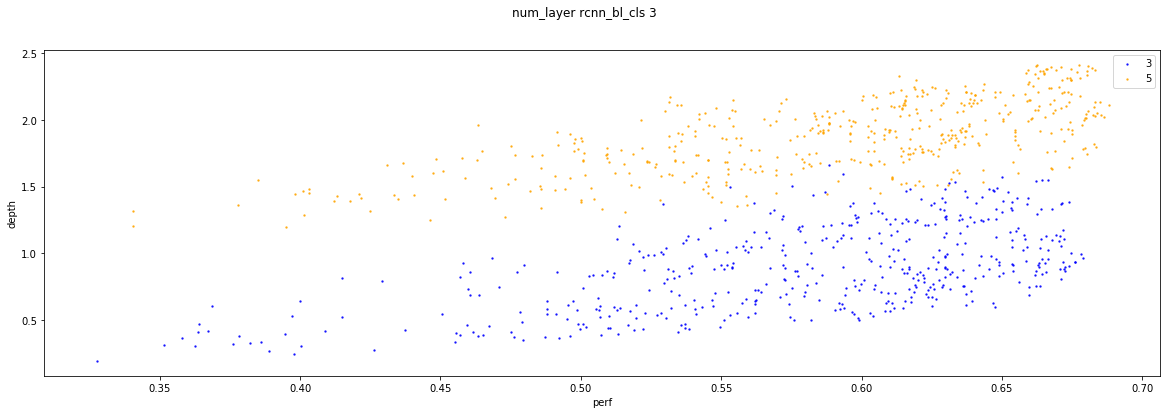

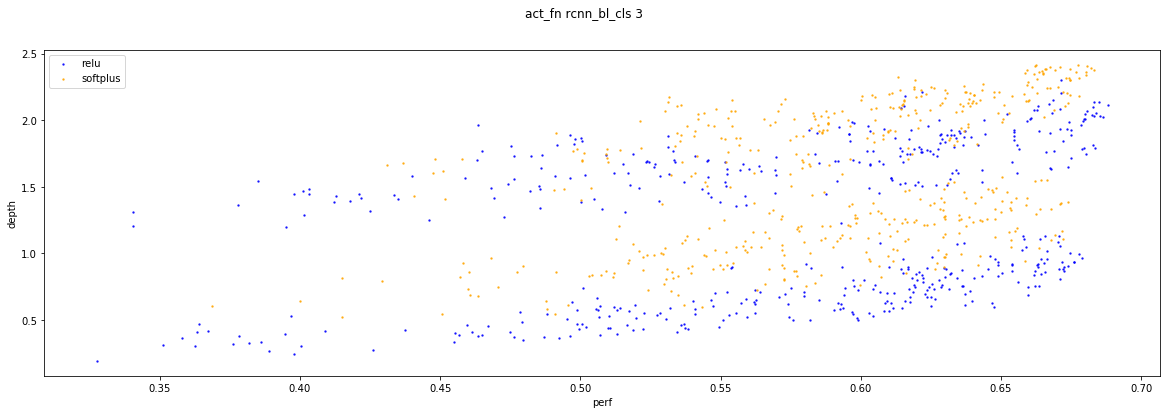

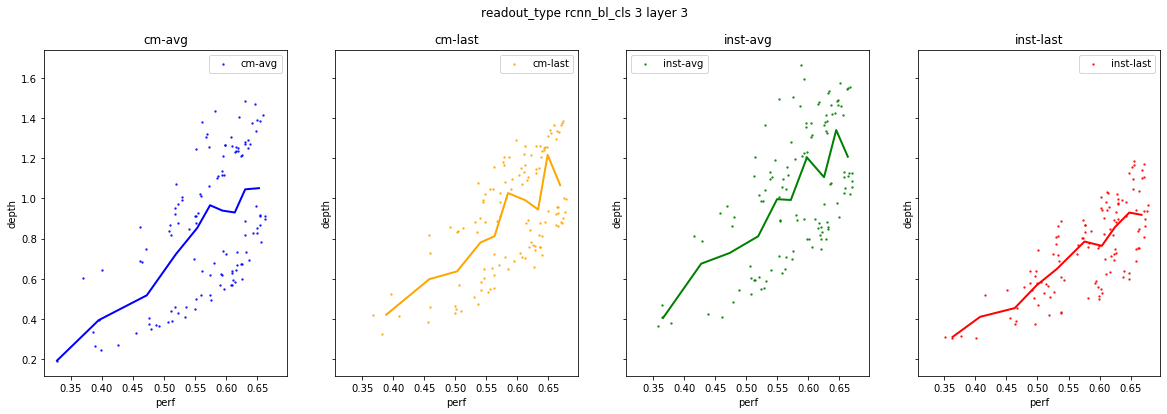

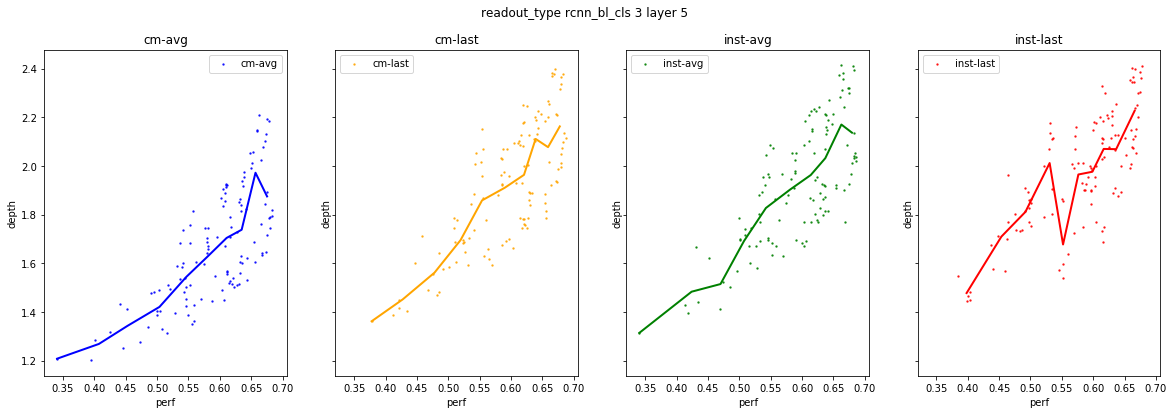

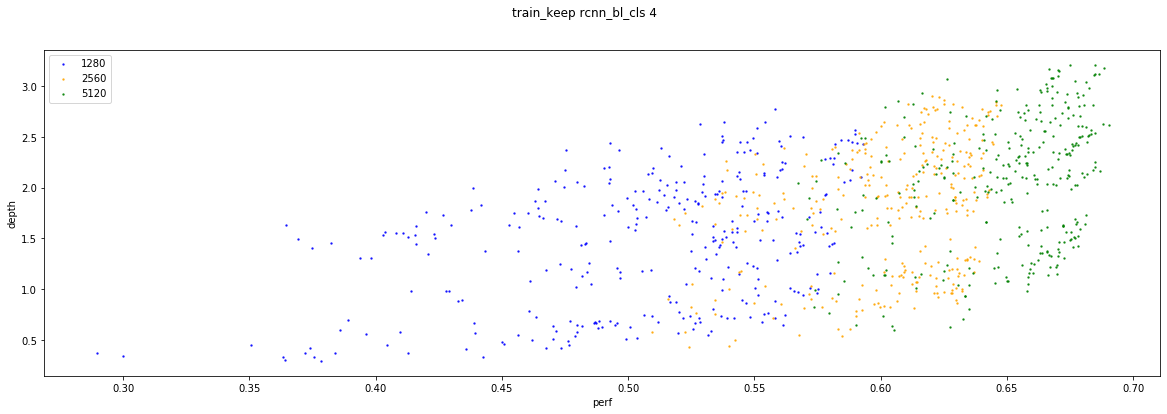

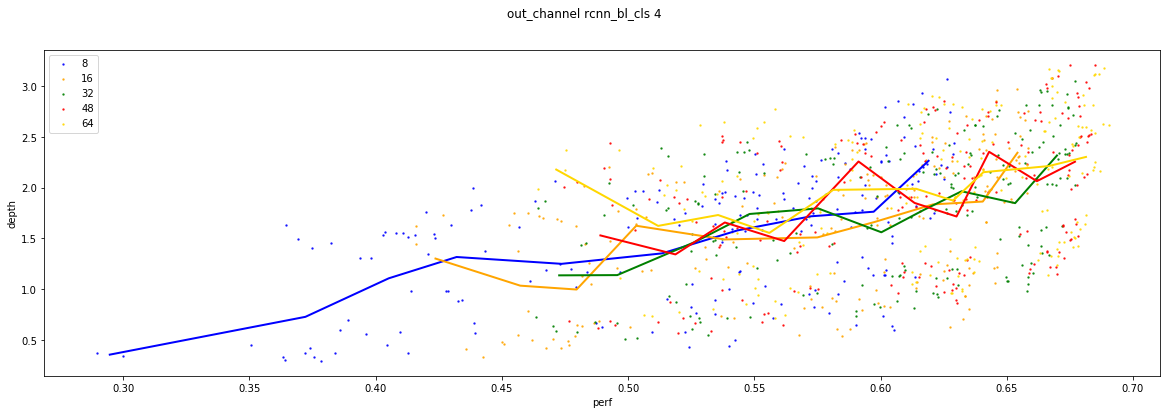

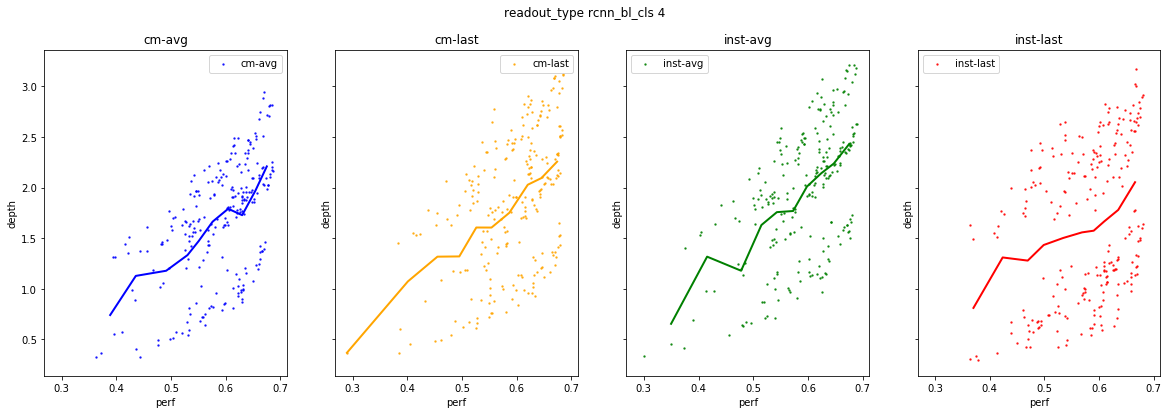

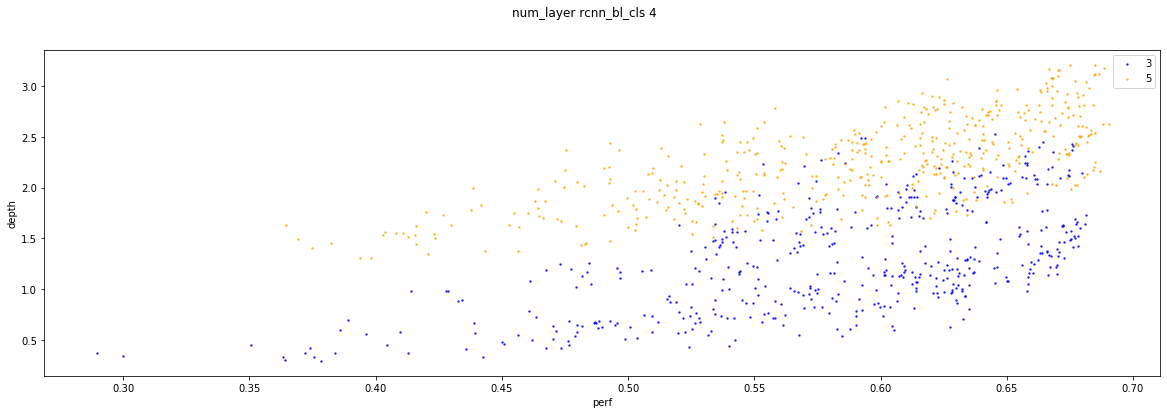

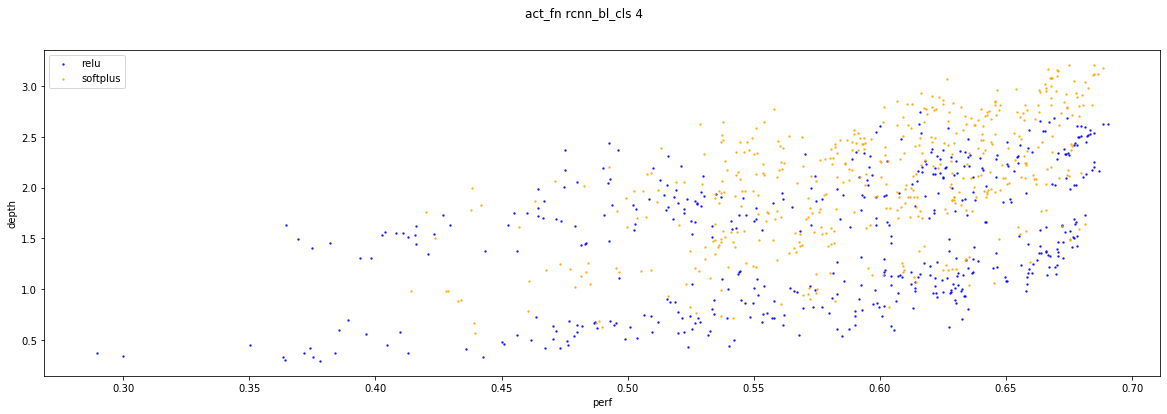

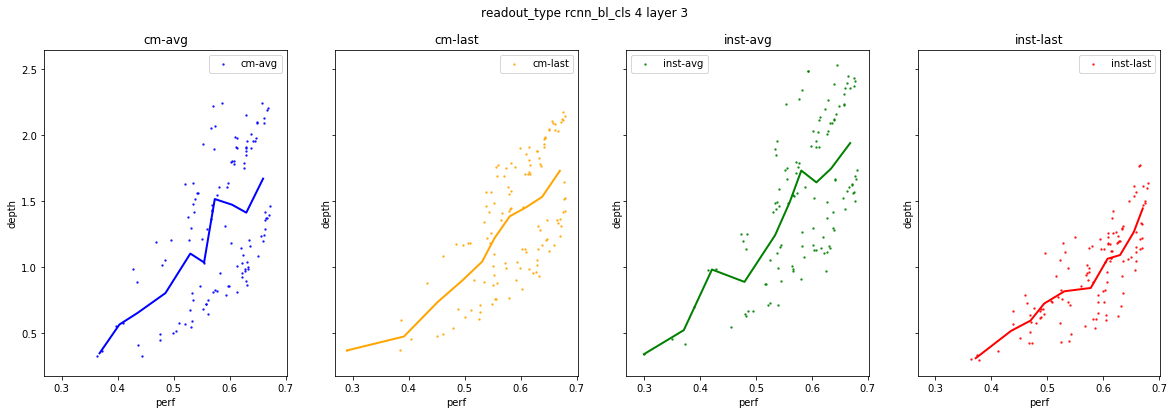

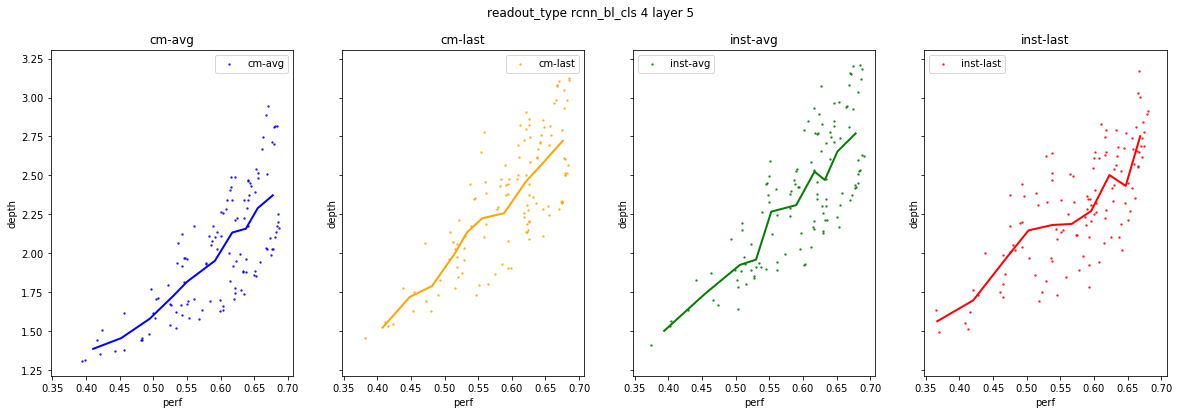

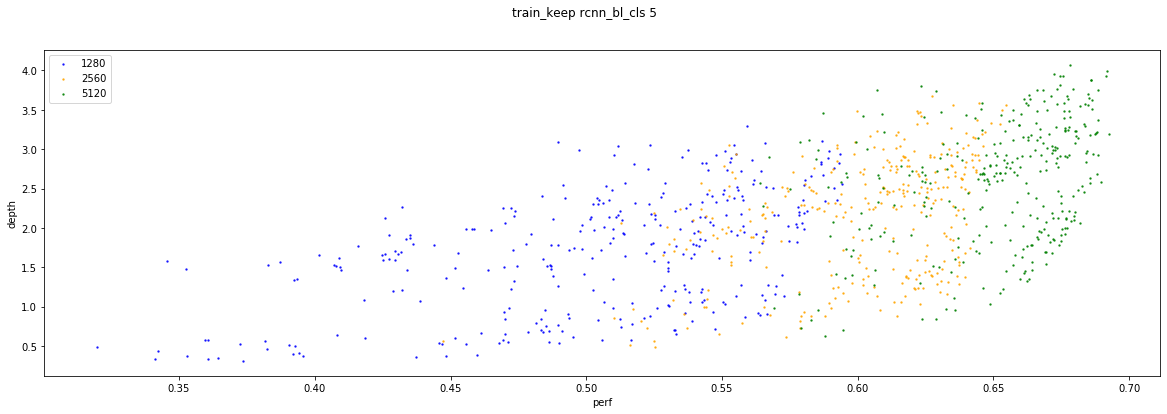

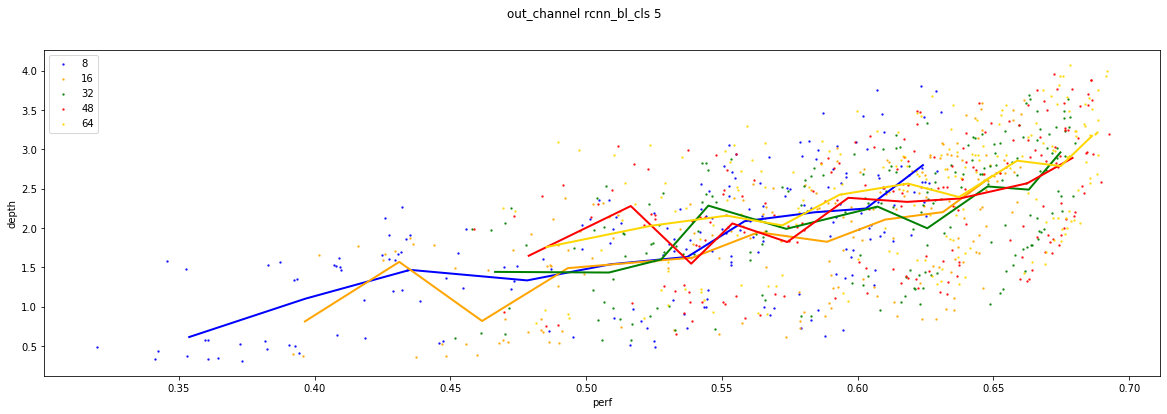

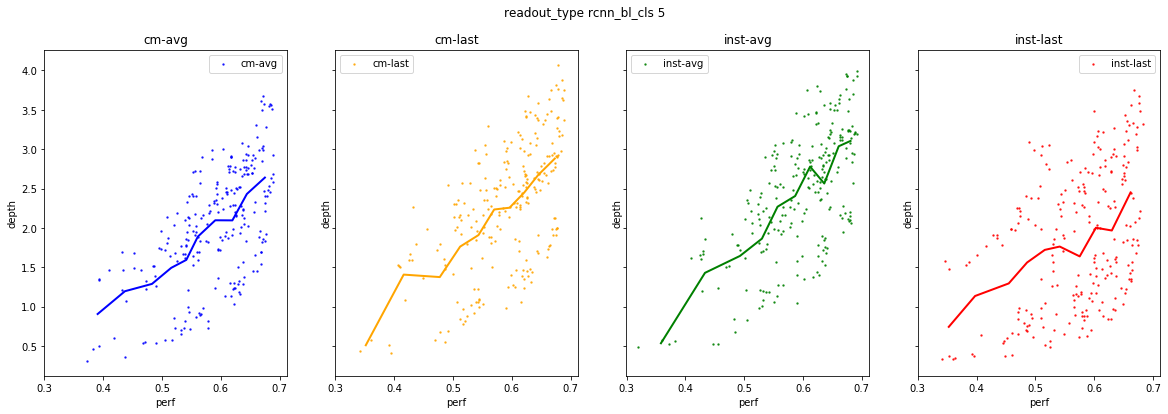

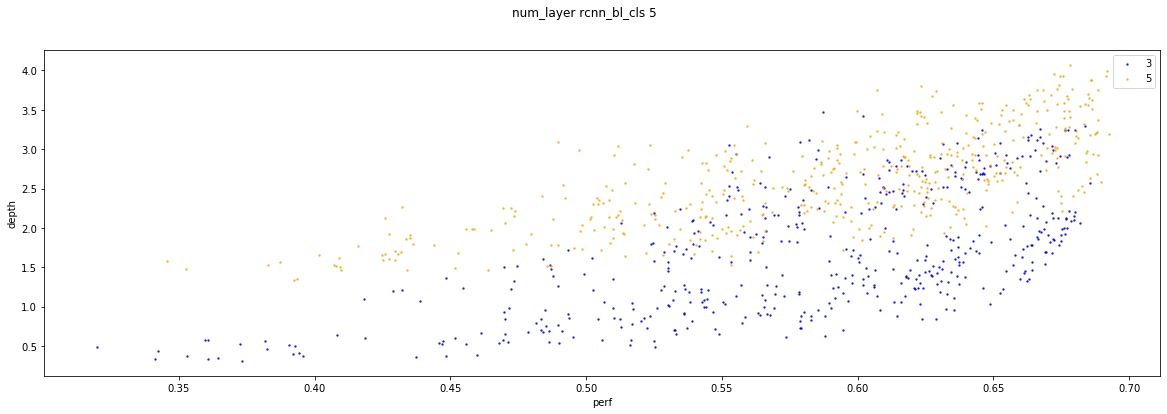

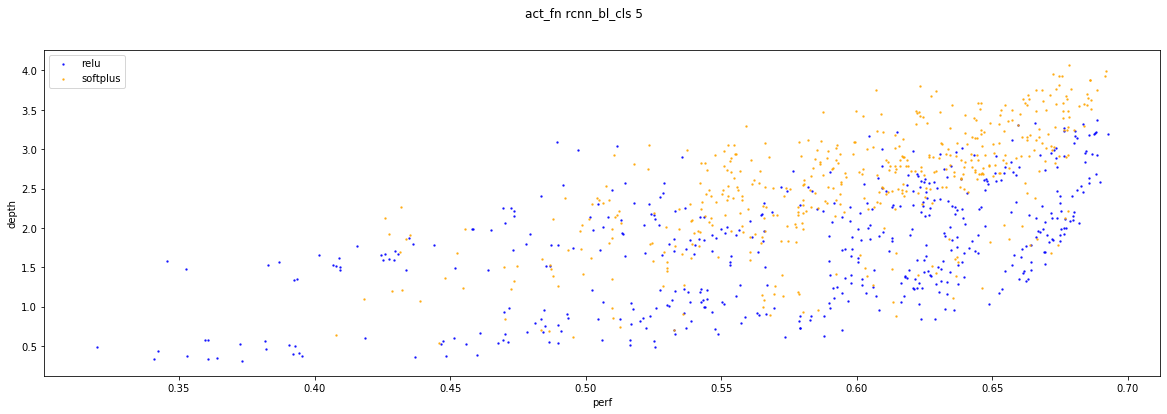

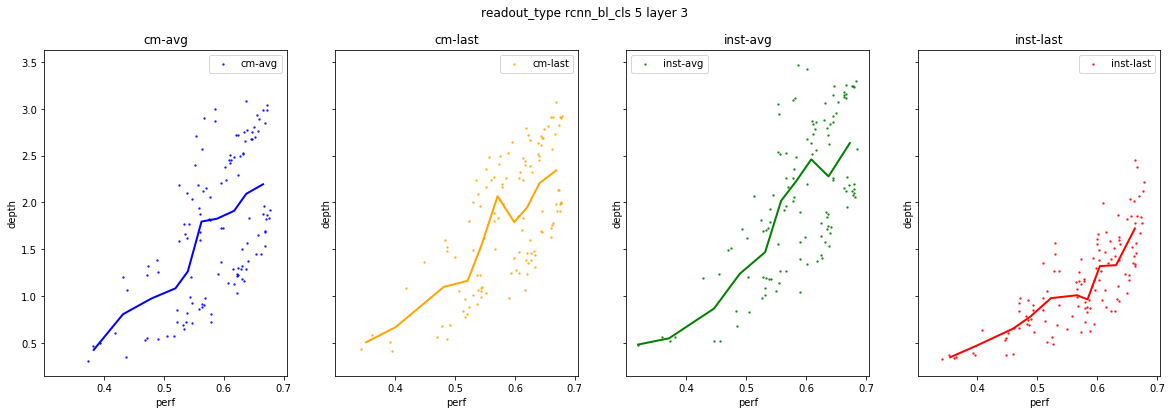

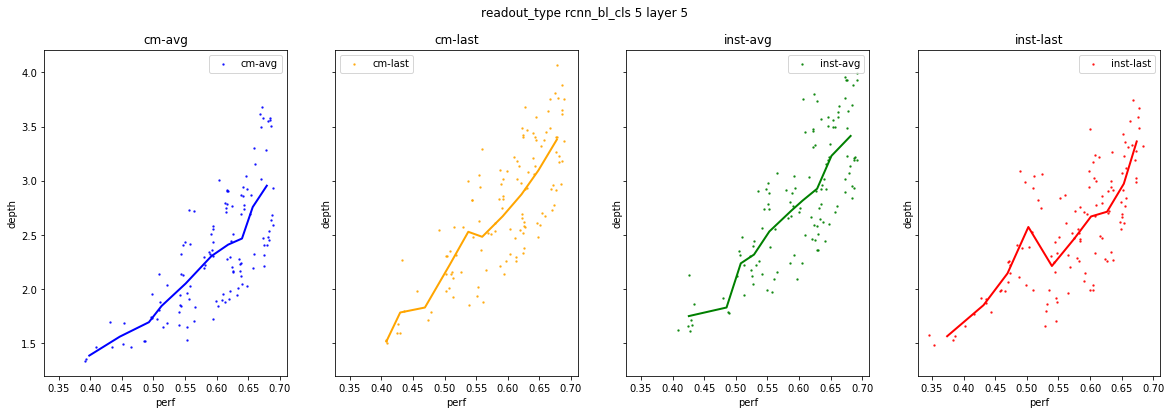

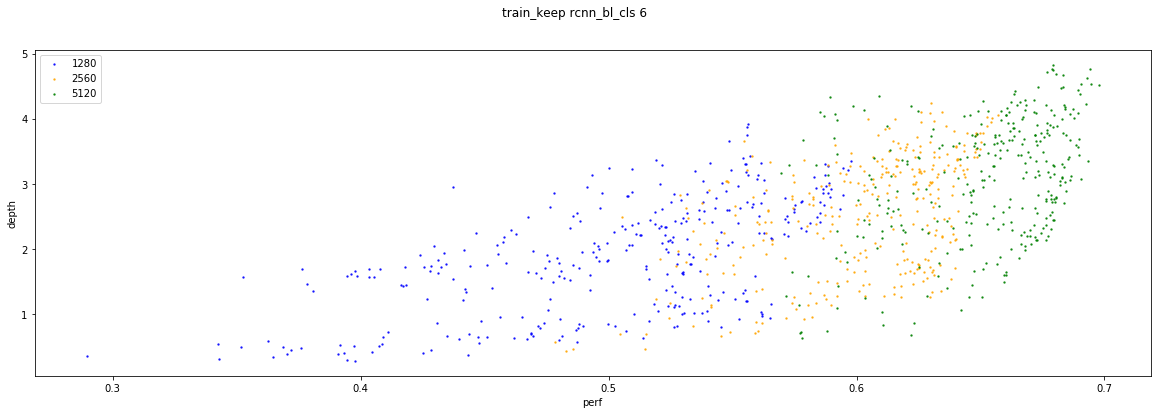

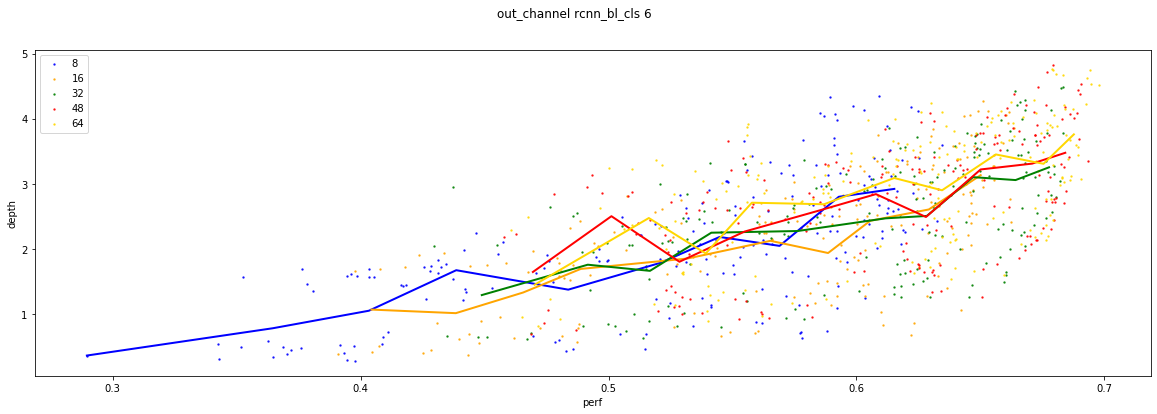

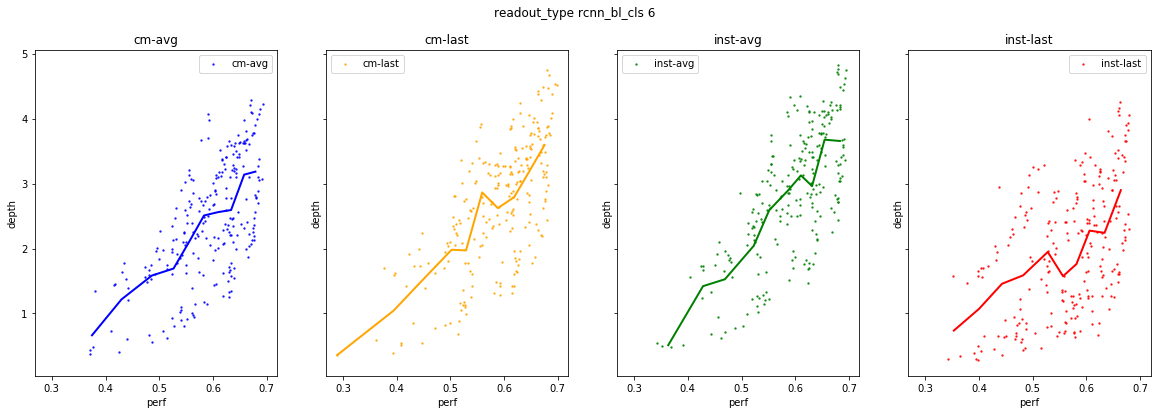

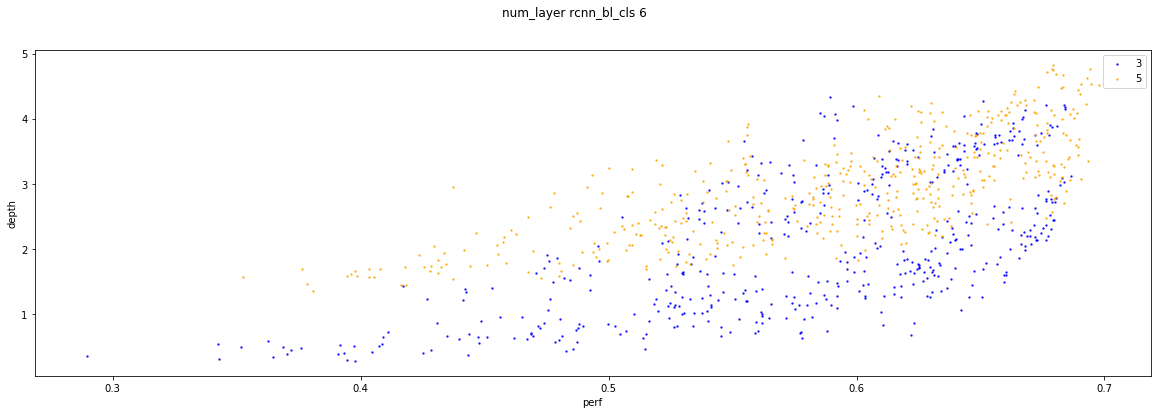

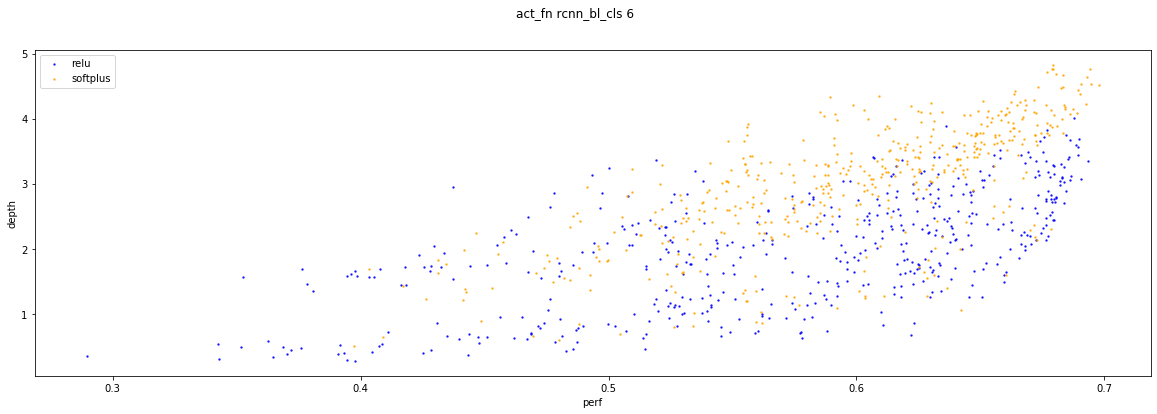

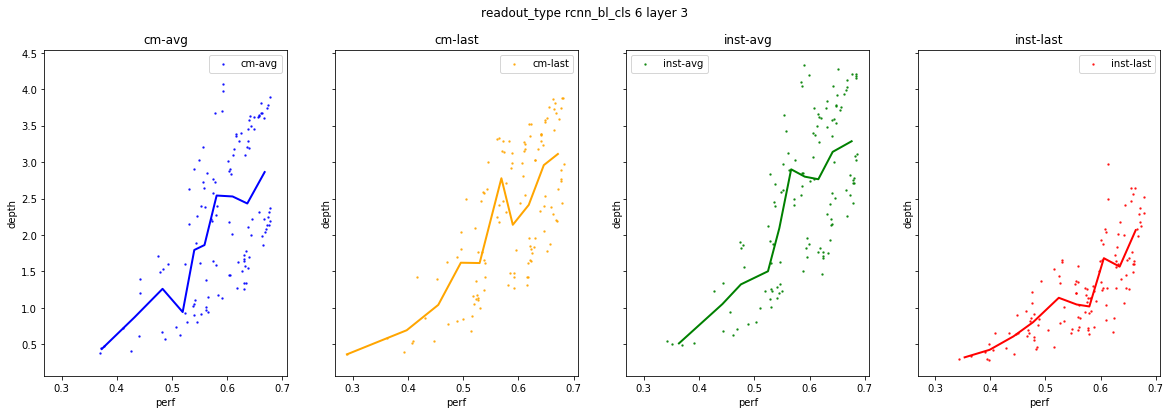

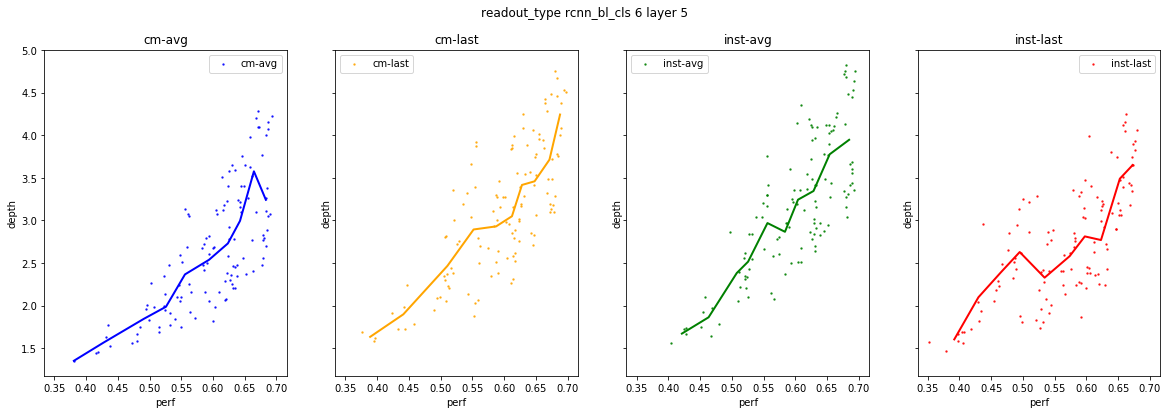

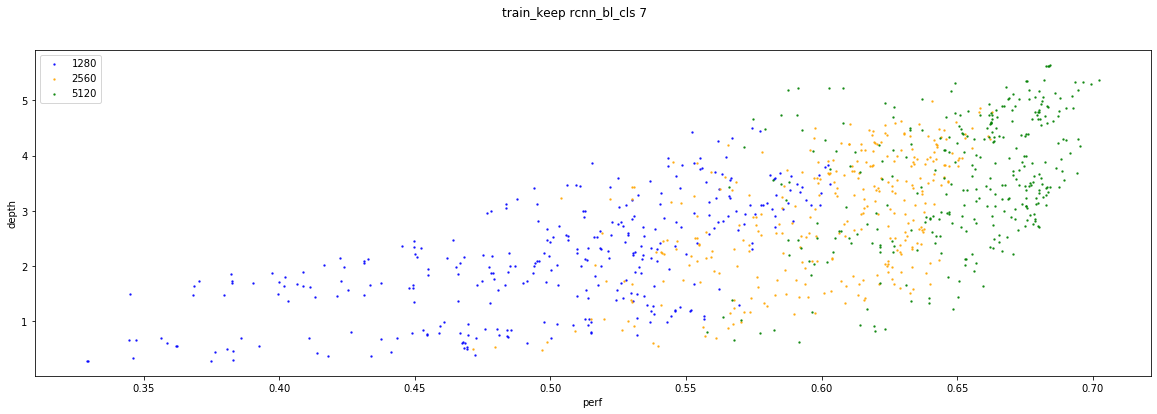

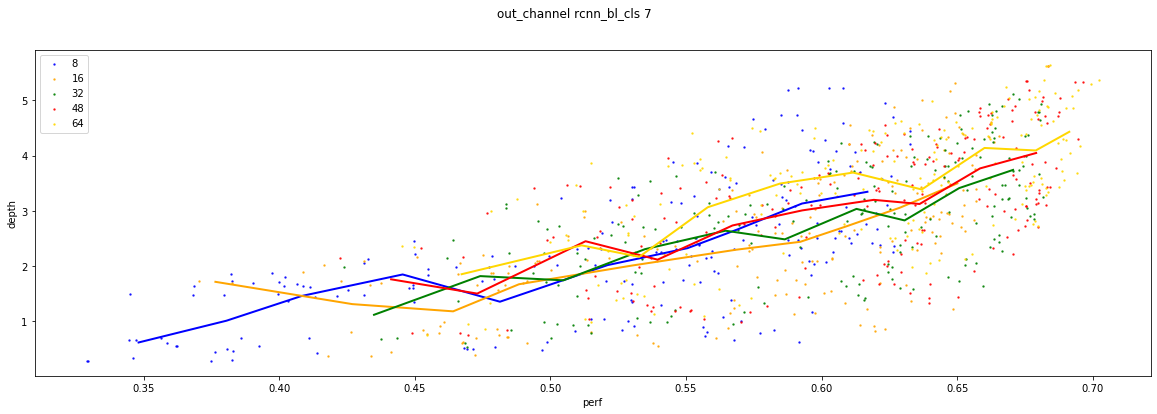

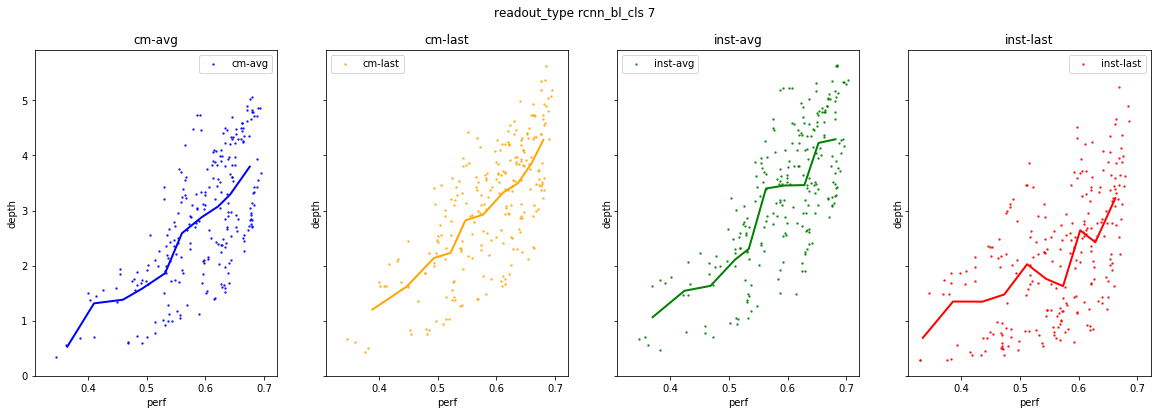

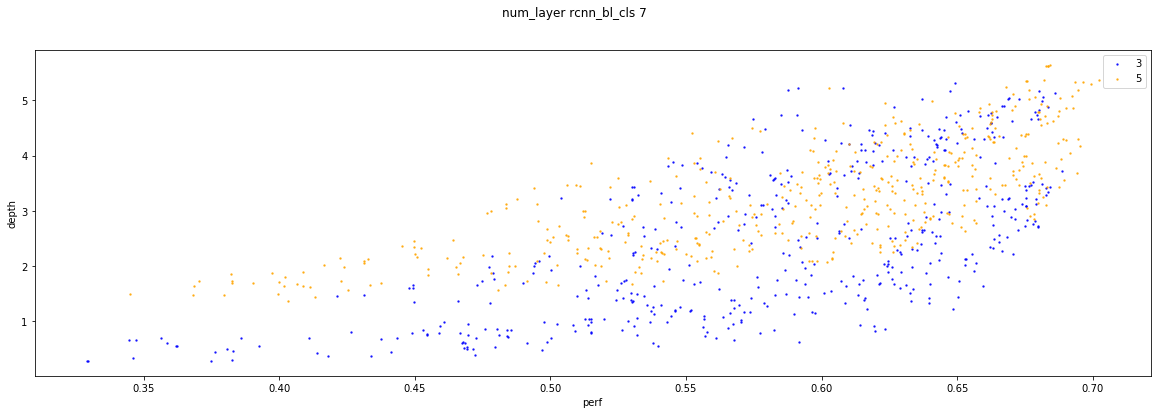

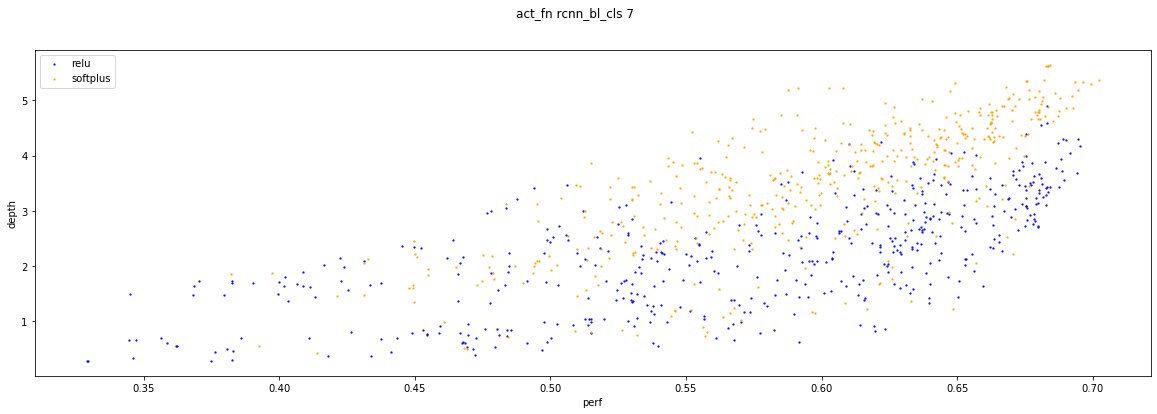

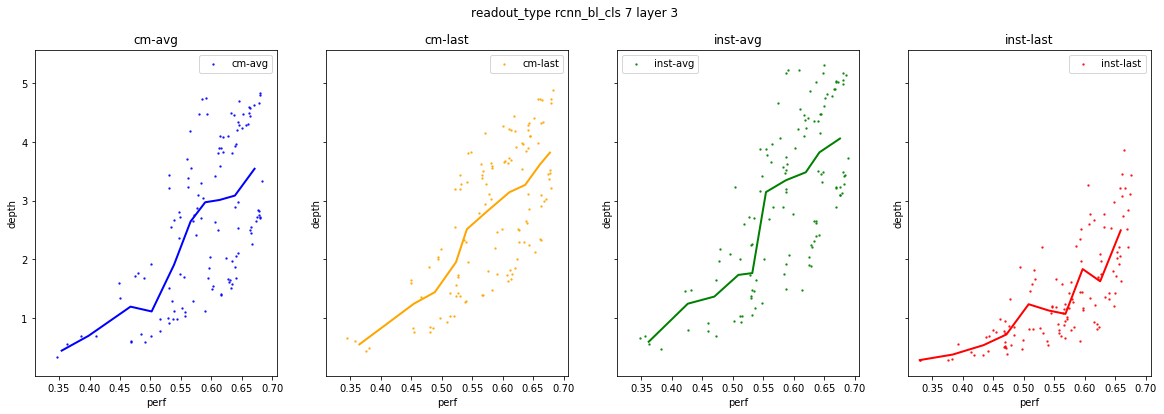

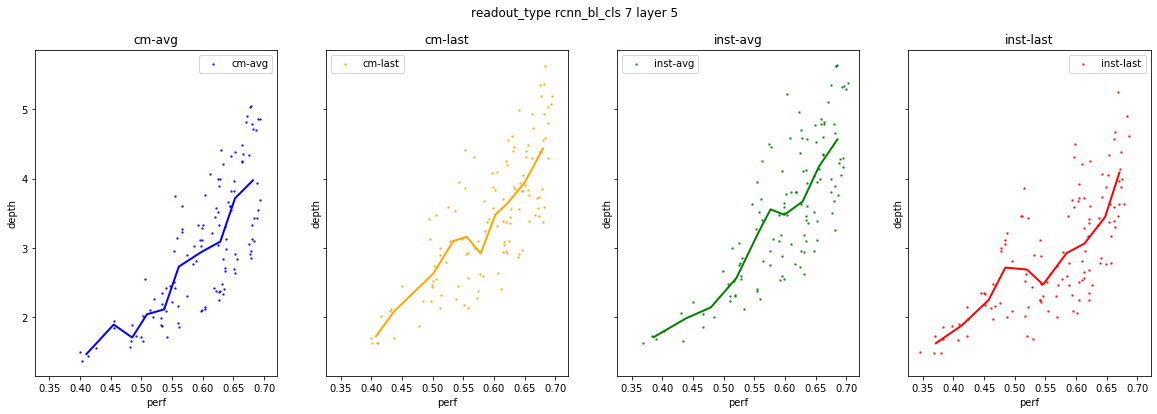

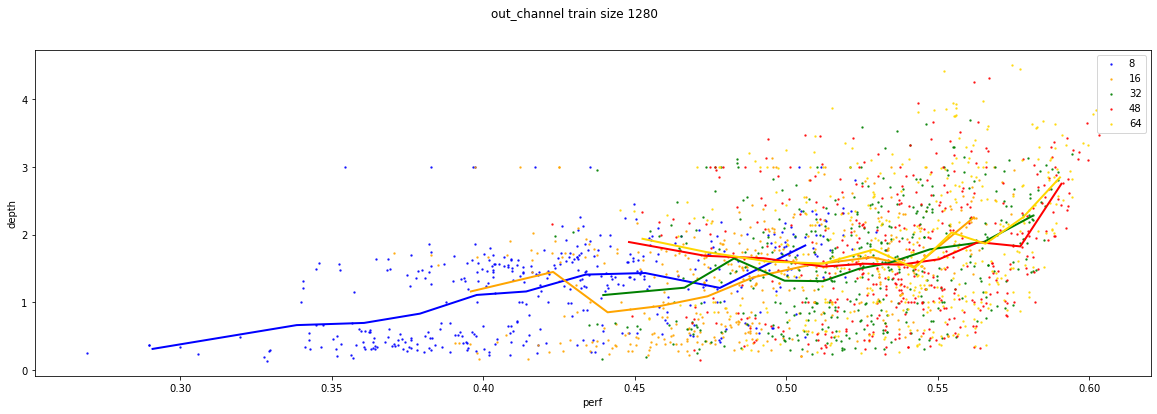

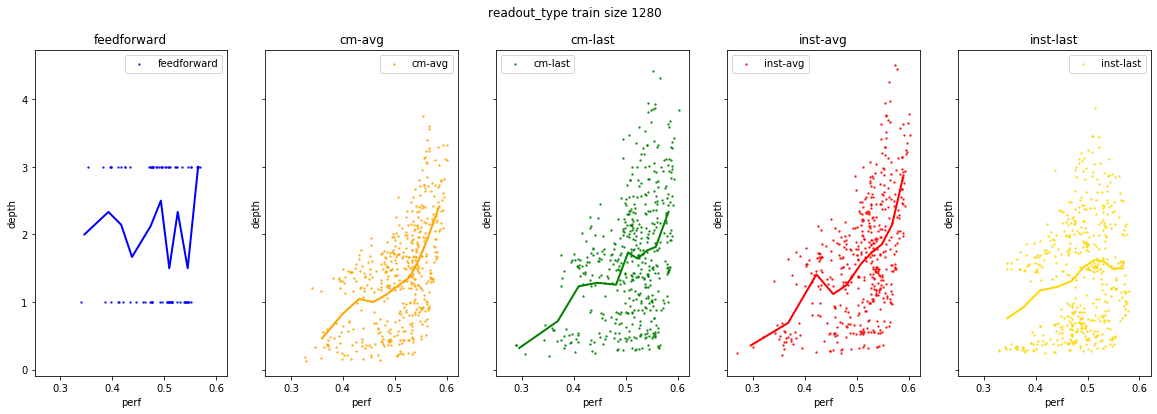

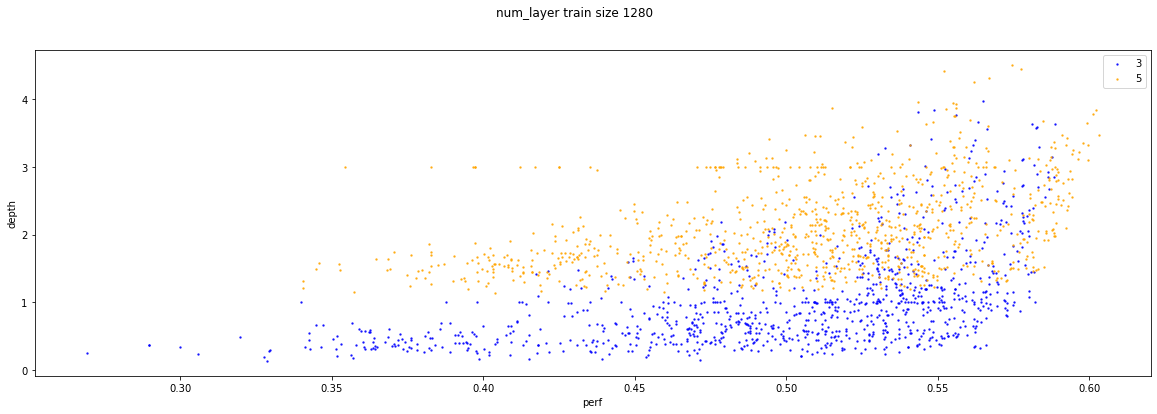

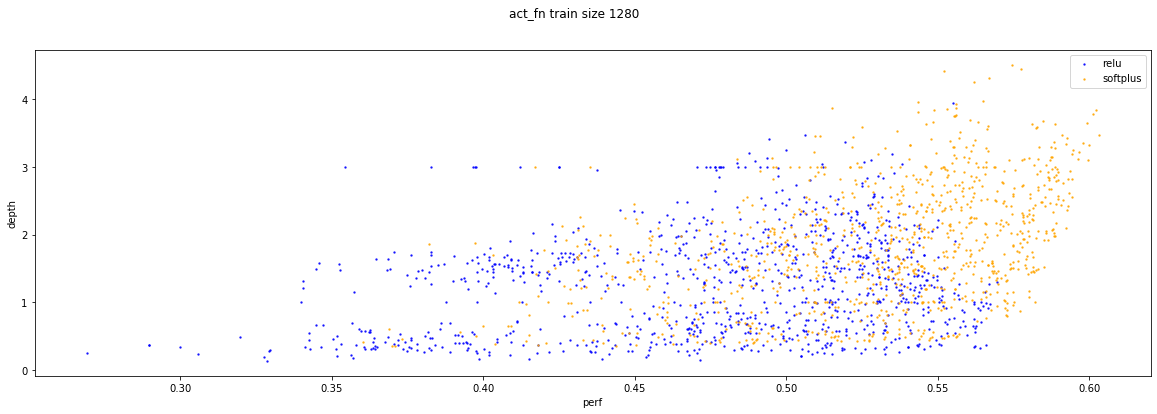

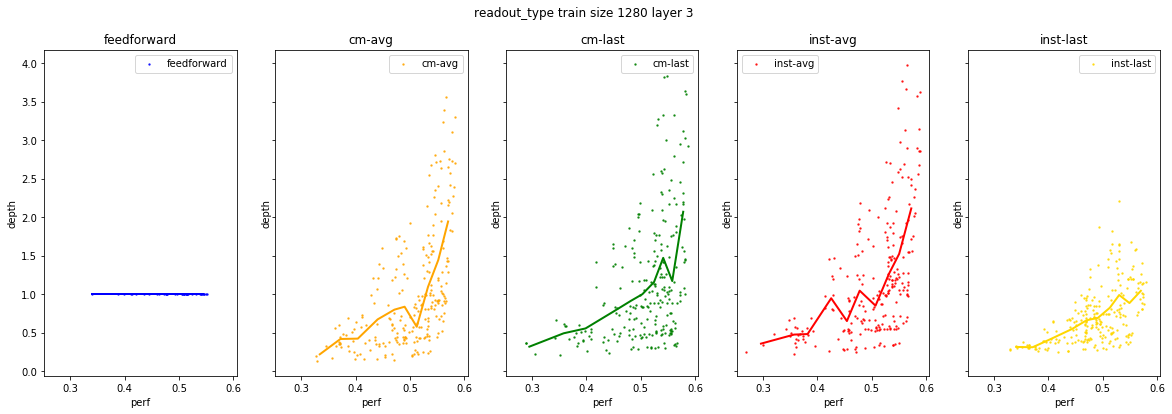

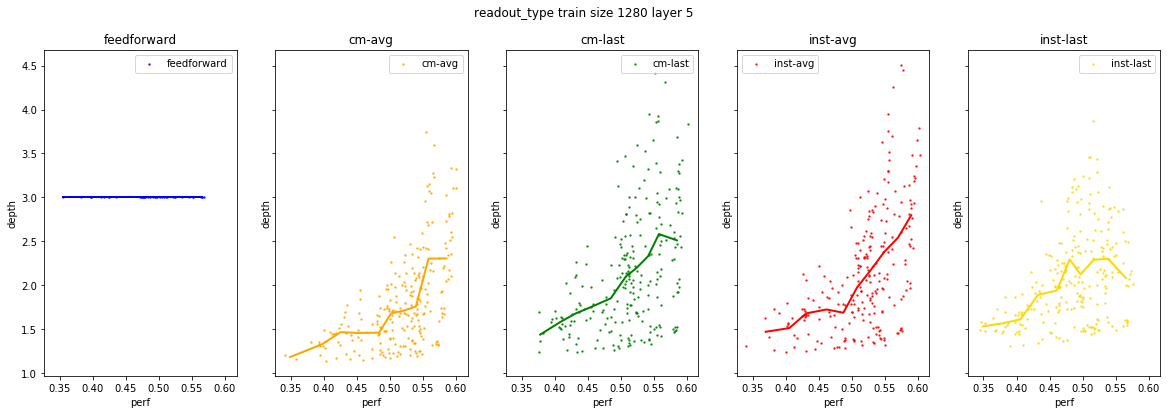

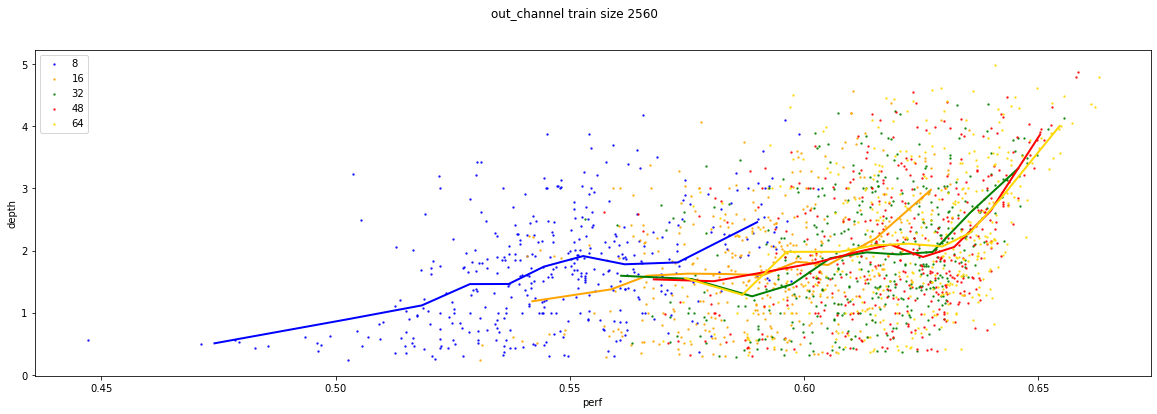

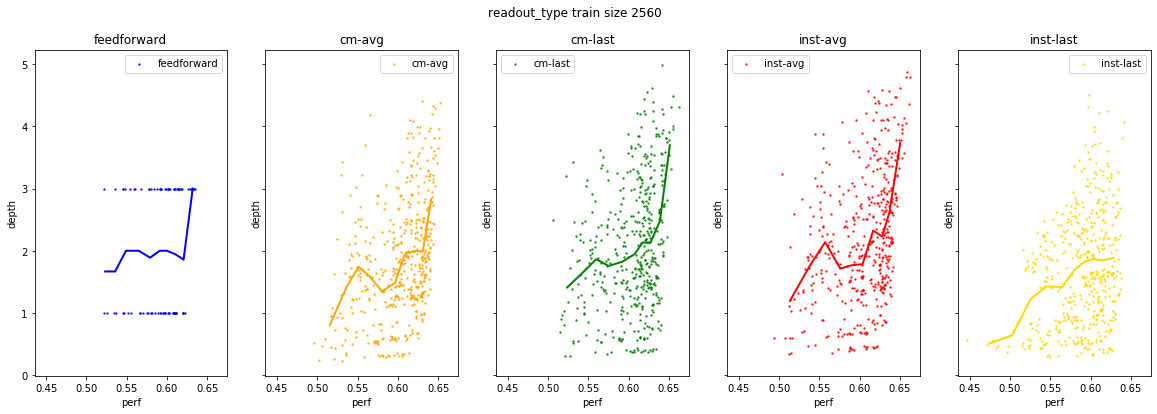

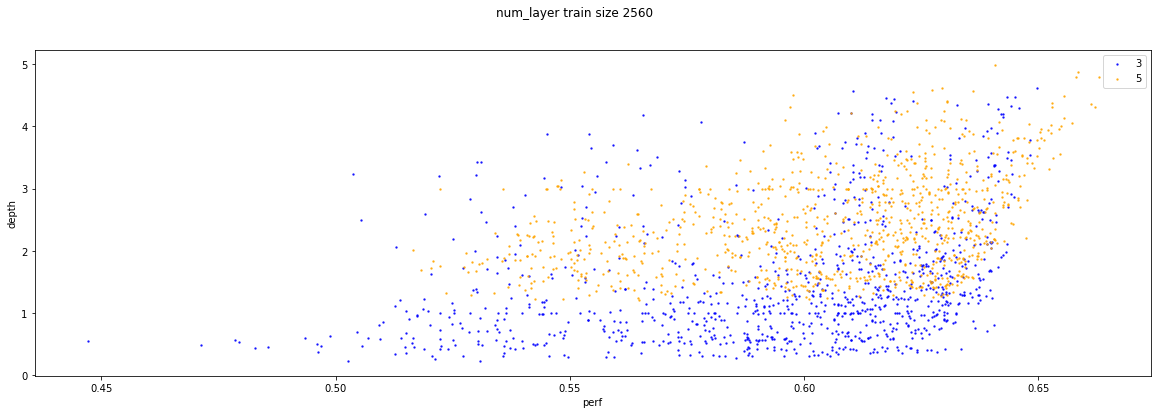

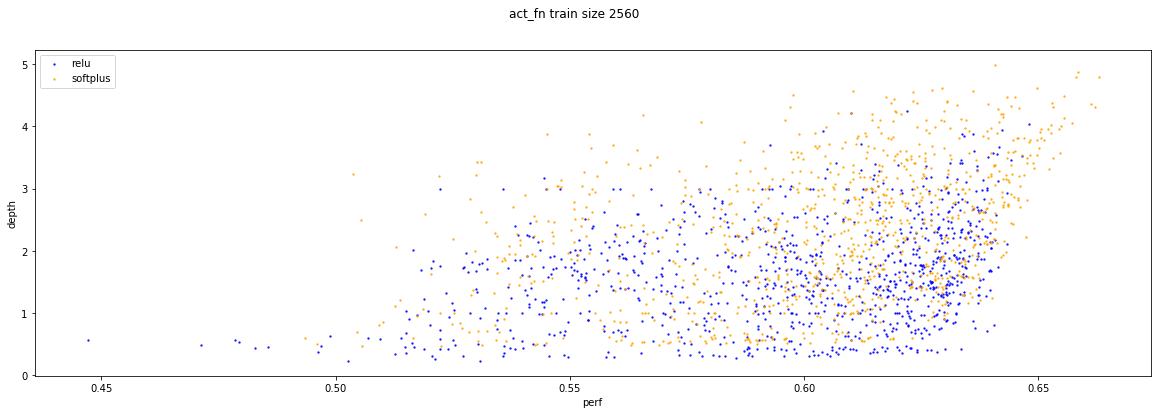

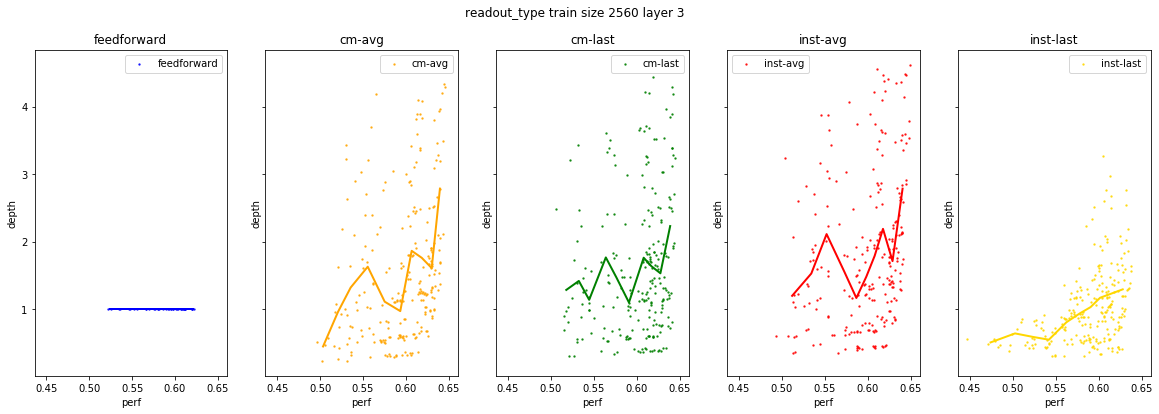

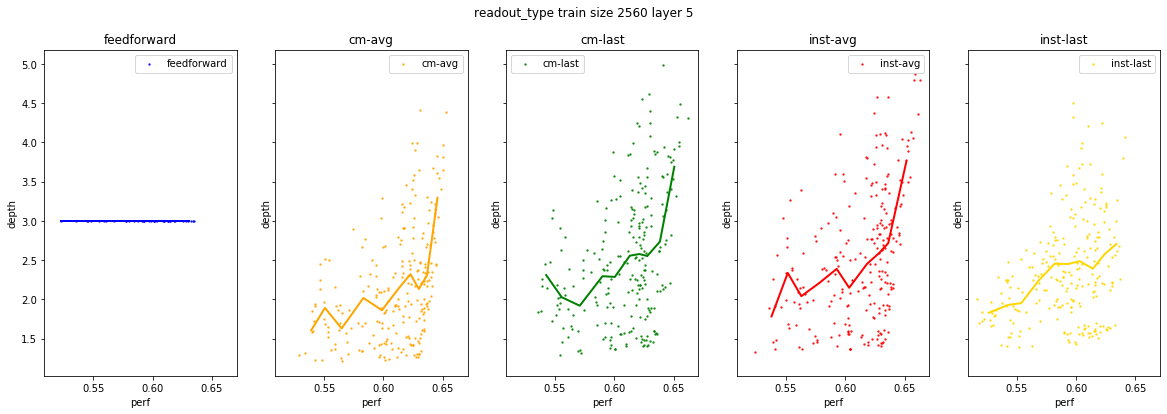

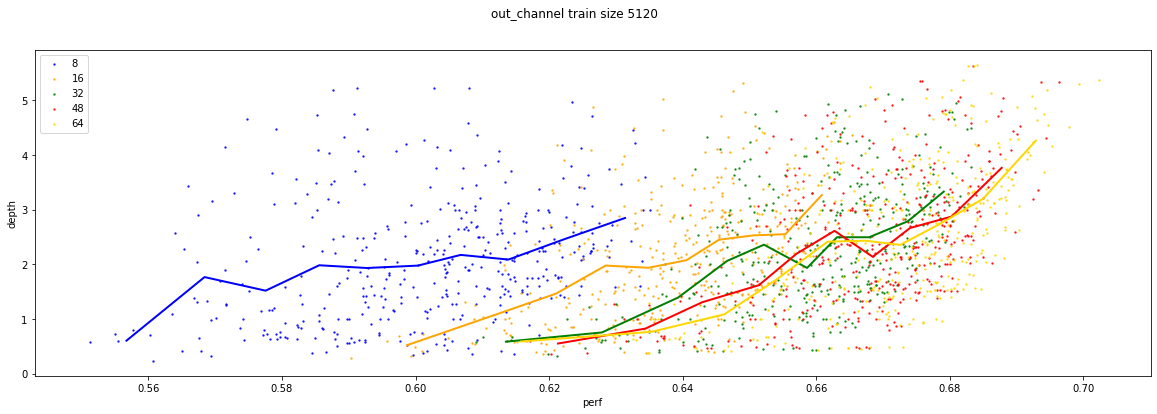

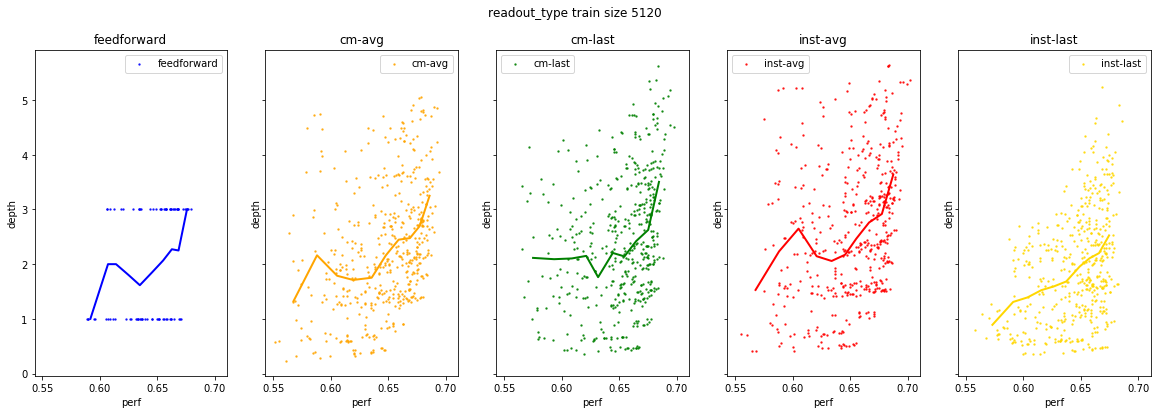

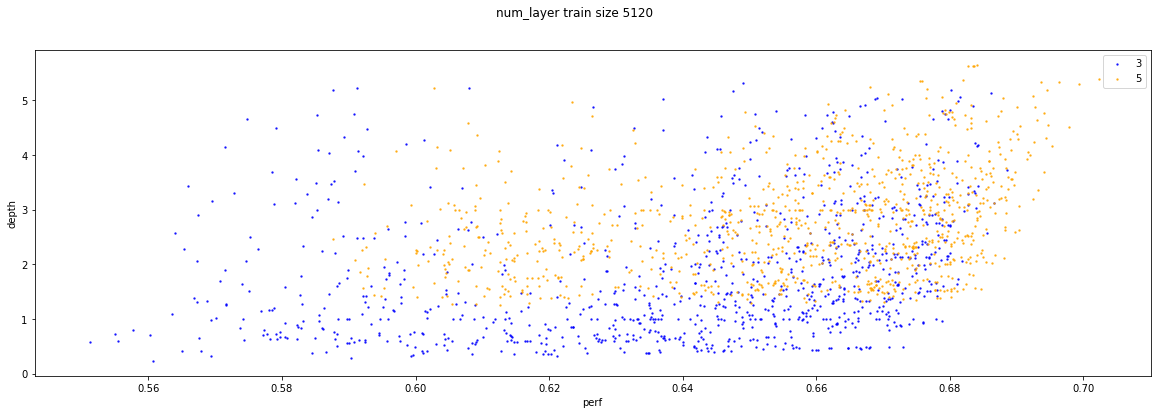

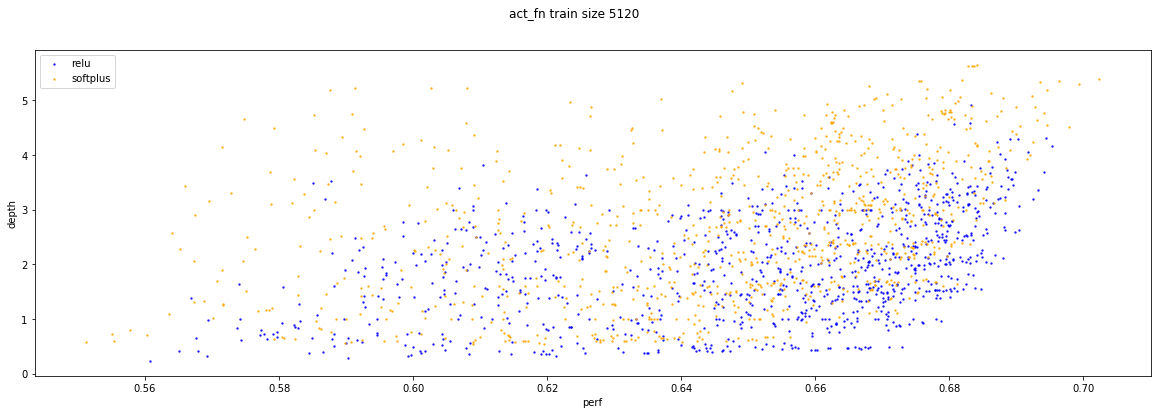

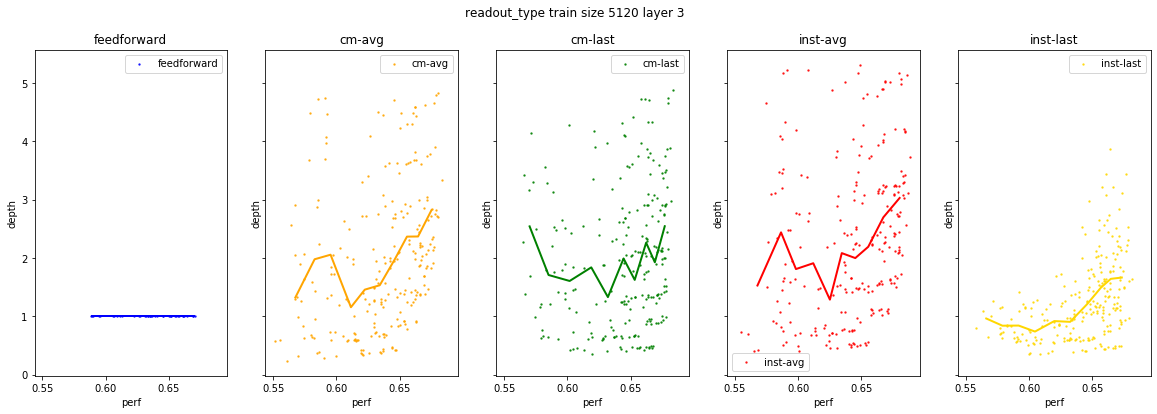

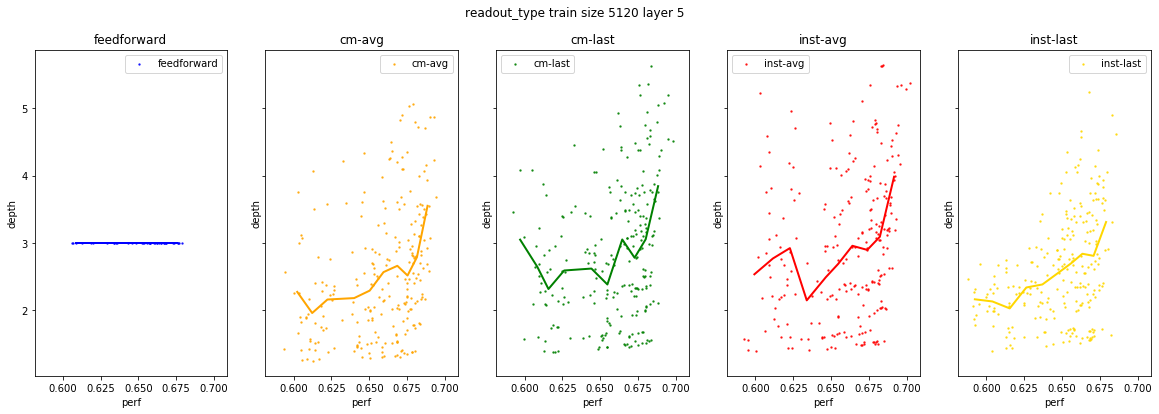

In [66]:
show_scatter_plots(df_merged_dict['df_merged'])